In [1]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [45]:
# load packages 
options(warn=-1)
library(reshape2)
library(ggplot2)
library(lme4)
library(lmerTest)
library(Rmisc)
library(plyr)
library(ggsignif)
library(gridExtra)
library(ggridges)
library(bayestestR)

In [5]:
# set working directory
dir = paste(getwd(),'/datafiles/',sep="")
setwd(dir)

# experiment 1
exp1_learning<-read.csv("exp1_learning")
exp1_memory<-read.csv("exp1_memory")
exp1_choice<-read.csv("exp1_choice")
exp1_indDiff<-read.csv("exp1_indDiff")
exp1_liks<-read.csv("exp1_liks")
exp1_STAN<-read.csv("exp1_STAN")

# experiment 2
exp2_learning<-read.csv("exp2_learning")
exp2_memory<-read.csv("exp2_memory")
exp2_choice<-read.csv("exp2_choice")
exp2_indDiff<-read.csv("exp2_indDiff")
exp2_liks<-read.csv("exp2_liks")
exp2_STAN_explicit<-read.csv("exp2_STAN_explicit")
exp2_STAN_implicit<-read.csv("exp2_STAN_implicit")
exp2_indDiff_slopes<-read.csv("exp2_indDiff_slopes")

confMat_liks<-as.matrix(read.table('confMat_liks.txt',header=FALSE))
confMat_BIC<-as.matrix(read.table('confMat_BIC.txt',header=FALSE))

# subset datafiles

# learning
exp2_c1_learning<-exp2_learning[exp2_learning$condition=='c1',]
exp2_c2_learning<-exp2_learning[exp2_learning$condition=='c2',]

# memory
exp2_mem_c1<-exp2_memory[exp2_memory$condition=='c1',]
exp2_mem_c2<-exp2_memory[exp2_memory$condition=='c2',]
exp2_mem_explicit<-exp2_memory[exp2_memory$memoryType=='explicit',]
exp2_mem_implicit<-exp2_memory[exp2_memory$memoryType=='implicit',]
exp2_mem_explicit_c1<-exp2_mem_explicit[exp2_mem_explicit$condition=='c1',]
exp2_mem_explicit_c2<-exp2_mem_explicit[exp2_mem_explicit$condition=='c2',]
exp2_mem_implicit_c1<-exp2_mem_implicit[exp2_mem_implicit$condition=='c1',]
exp2_mem_implicit_c2<-exp2_mem_implicit[exp2_mem_implicit$condition=='c2',]

# individual differences 
exp2_indDiff_slopes_cue = exp2_indDiff_slopes[exp2_indDiff_slopes$event=='cue',]
exp2_indDiff_slopes_exp<-exp2_indDiff_slopes[exp2_indDiff_slopes$memoryType=='explicit',]
exp2_indDiff_slopes_imp<-exp2_indDiff_slopes[exp2_indDiff_slopes$memoryType=='implicit',]

# choice
exp1_within<-exp1_choice[(exp1_choice$choiceType=='within'),]
exp2_explicit_btwn<-exp2_choice[(exp2_choice$memoryType=='explicit'&exp2_choice$choiceType=='between'),]
exp2_implicit_btwn<-exp2_choice[(exp2_choice$memoryType=='implicit'&exp2_choice$choiceType=='between'),]
exp2_explicit_within<-exp2_choice[(exp2_choice$memoryType=='explicit'&exp2_choice$choiceType=='within'),]
exp2_implicit_within<-exp2_choice[(exp2_choice$memoryType=='implicit'&exp2_choice$choiceType=='within'),]

# Learning

## Experiment 1

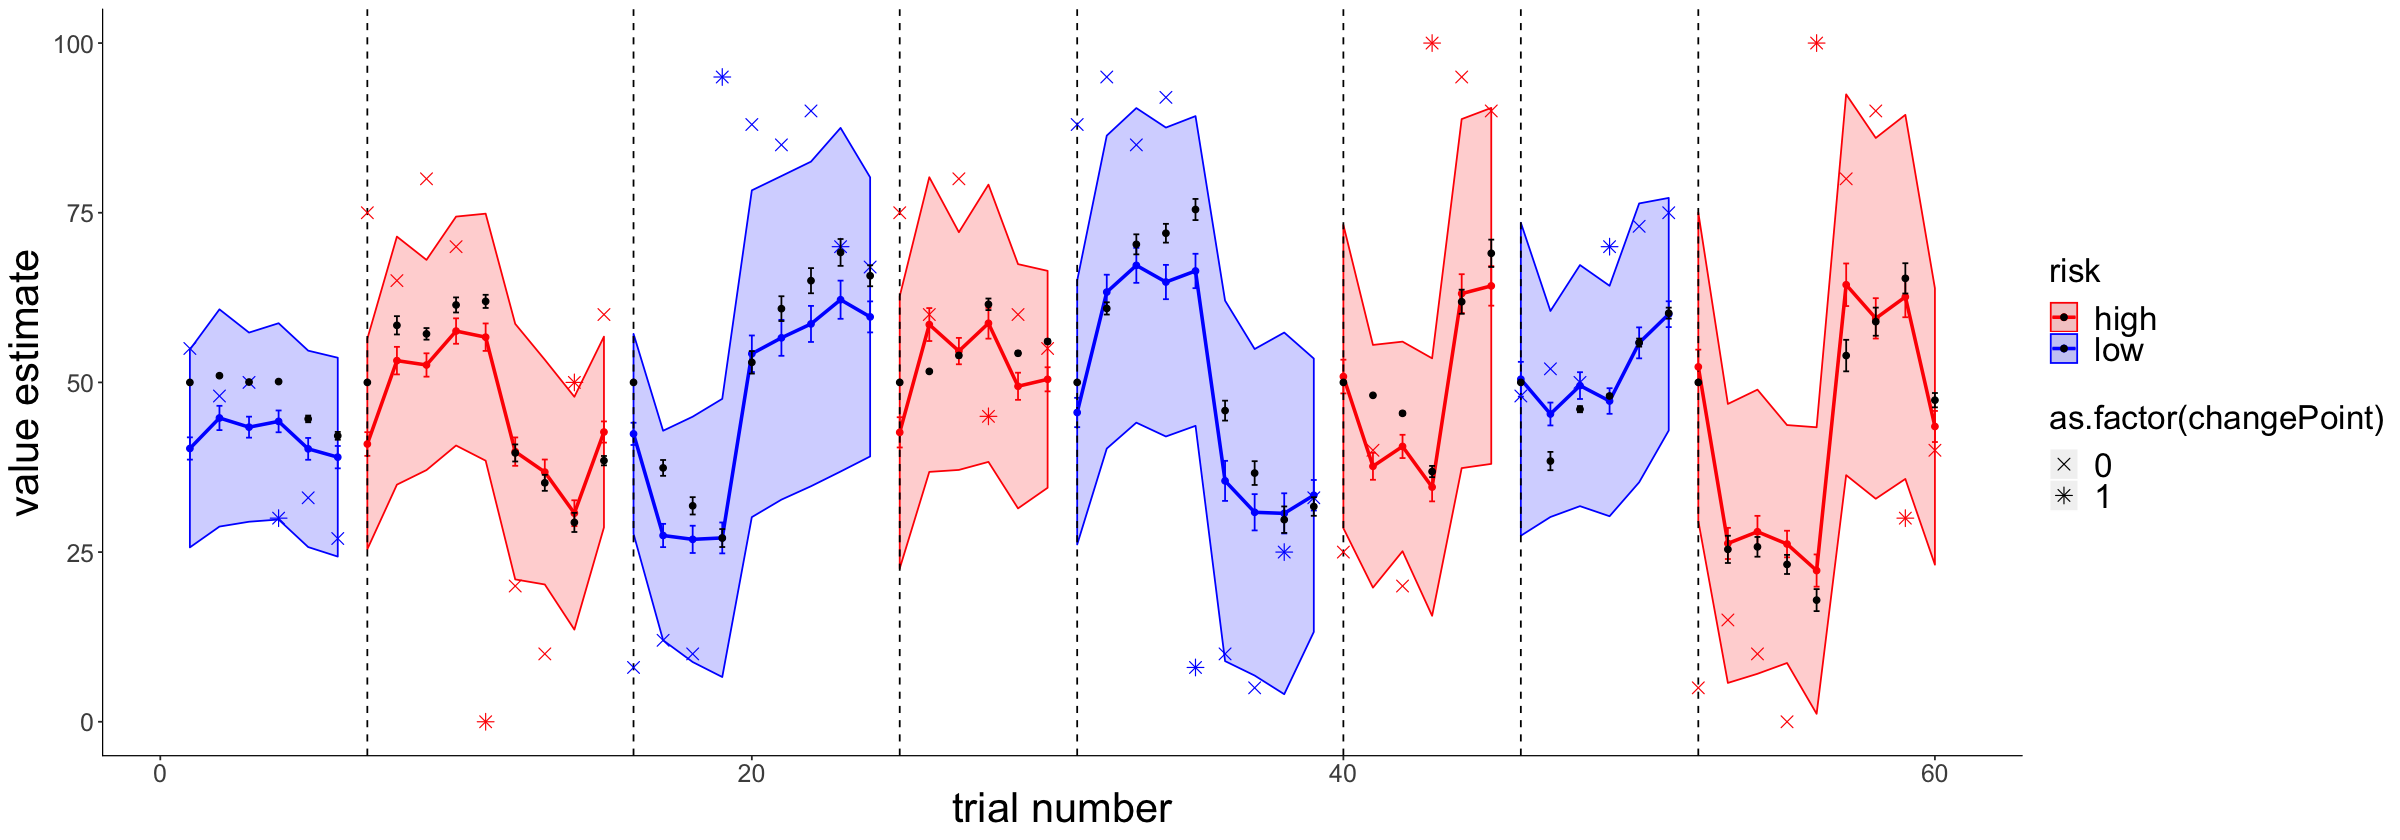

In [6]:
# set image size 
options(repr.plot.width=20,repr.plot.height=7)

# calculate means from subject data 
exp1_learning_means<-summarySE(exp1_learning,measurevar="estimate",groupvars=c("trialNum","risk","room","changePoint","reward"),na.rm=TRUE)

# calculate means from model data 
exp1_modelVals_means<-summarySE(exp1_learning,measurevar="absD_vals",groupvars=c("trialNum","risk","room"),na.rm=TRUE)
colnames(exp1_modelVals_means)[5]<-'estimate' # re-name for ggplot (need consistent names)

# plot fig  
ggplot(exp1_learning_means,aes(x=trialNum,y=estimate,color=risk,fill=risk,group=room))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  geom_line(aes(group=room),size=1)+  
  geom_ribbon(exp1_learning_means,mapping=aes(ymin=estimate-sd,ymax=estimate+sd),alpha=0.2)+
  geom_errorbar(data=exp1_learning_means,mapping=aes(x=trialNum,ymin=estimate-se, ymax=estimate+se),width=.2)+
  scale_fill_manual(values=c("red","blue"))+scale_colour_manual(values=c("red","blue"))+
  scale_shape_manual(values=c(4,8))+scale_size_manual(values=c(3,3))+ 
  geom_vline(xintercept=7,linetype="dashed",colour="black")+geom_vline(xintercept=16,linetype="dashed",colour="black")+geom_vline(xintercept=25,linetype="dashed",colour="black")+geom_vline(xintercept=31,linetype="dashed",colour="black")+
  geom_vline(xintercept=40,linetype="dashed",colour="black")+geom_vline(xintercept=46,linetype="dashed",colour="black")+geom_vline(xintercept=52,linetype="dashed",colour="black")+
  geom_point(data=exp1_learning_means,mapping=aes(x=trialNum,y=estimate))+
  geom_point(data=exp1_learning_means,mapping=aes(x=trialNum,y=reward,shape=as.factor(changePoint),size=as.factor(changePoint)))+
  geom_point(data=exp1_modelVals_means,mapping=aes(x=trialNum,y=estimate),color="black")+
  geom_errorbar(data=exp1_modelVals_means,mapping=aes(x=trialNum,ymin=estimate-se, ymax=estimate+se),width=.2,color="black")+
  coord_cartesian(xlim = c(1,60), ylim = c(0,100))+xlab('trial number')+ylab('value estimate')

## learning rates (supplemental) 

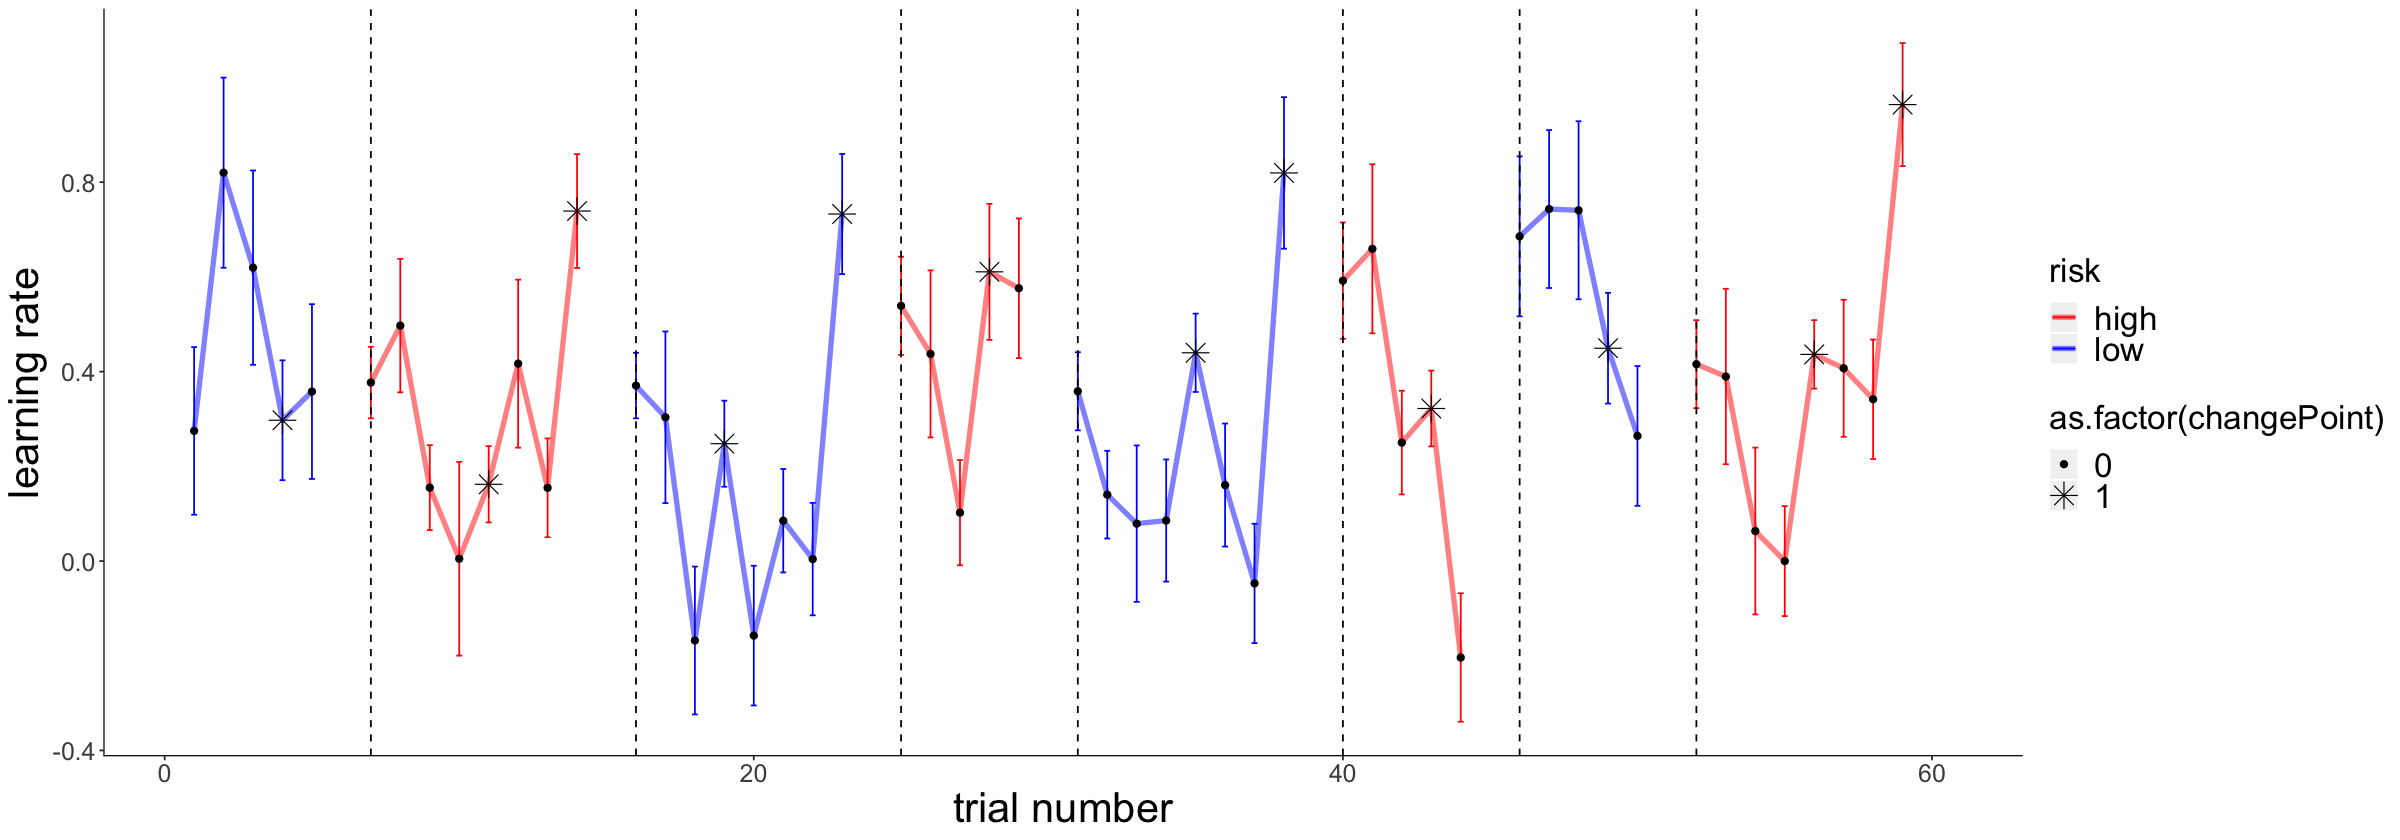

In [7]:
# set image size 
options(repr.plot.width=20,repr.plot.height=7)

# learning rate means (NaNs for last trial in each room)
exp1_lr_means<-summarySE(exp1_learning,measurevar="lr",groupvars=c("trialNum","risk","changePoint"),na.rm=TRUE)

# plot fig 
ggplot(exp1_lr_means,aes(x=trialNum,y=lr,color=risk,group=risk))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  geom_line(size=1.5,alpha=0.5)+
  scale_fill_manual(values=c("red","blue"))+scale_colour_manual(values=c("red","blue"))+
  geom_errorbar(mapping=aes(ymin=lr-se, ymax=lr+se),width=.2)+
  geom_point(aes(shape=as.factor(changePoint),size=as.factor(changePoint)),color="black")+xlab("")+ylab("")+
  scale_shape_manual(values=c(16,8))+scale_size_manual(values=c(2,5))+ 
  geom_vline(xintercept=7,linetype="dashed",colour="black")+geom_vline(xintercept=16,linetype="dashed",colour="black")+geom_vline(xintercept=25,linetype="dashed",colour="black")+geom_vline(xintercept=31,linetype="dashed",colour="black")+
  geom_vline(xintercept=40,linetype="dashed",colour="black")+geom_vline(xintercept=46,linetype="dashed",colour="black")+geom_vline(xintercept=52,linetype="dashed",colour="black")+
  ylab("learning rate")+xlab("trial number")

In [8]:
# analysis: learning rate ~ outcome PE 
absPElr<-lmer(scale(lr)~scale(out_absPE)+(1|subject),data=exp1_learning,control=lmerControl(optimizer="bobyqa"))
summary(absPElr)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(lr) ~ scale(out_absPE) + (1 | subject)
   Data: exp1_learning
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 10856.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5673 -0.3222  0.0638  0.3730  4.2226 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.03078  0.1754  
 Residual             0.96278  0.9812  
Number of obs: 3847, groups:  subject, 81

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        -0.01431    0.02524   80.55086  -0.567    0.572    
scale(out_absPE)    0.10203    0.01597 3841.74884   6.389 1.87e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scl(t_bsPE) -0.102

## Experiment 2

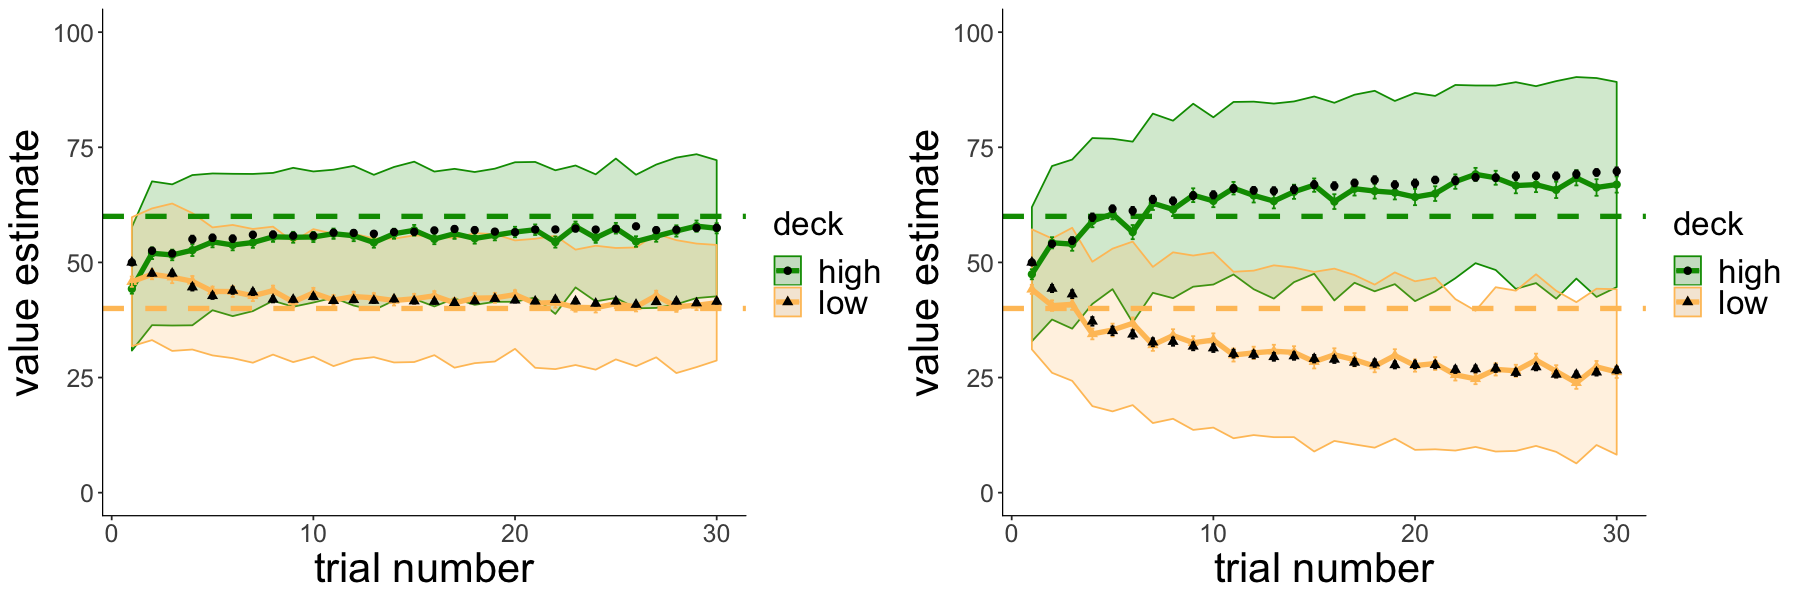

In [9]:
# set image size
options(repr.plot.width=15,repr.plot.height=5) # set image size using repr package

# CONDITION 1 (40-60)

# calculate means from subject data 
exp2_c1_learning_means<-summarySE(exp2_c1_learning,measurevar="estimate",groupvars=c("trialNum","deck"),na.rm=TRUE)

# calculate means from model data 
exp2_c1_modelVals_means<-summarySE(exp2_c1_learning,measurevar="absCueD_vals",groupvars=c("trialNum","deck"),na.rm=TRUE)

# fig 
p1<-ggplot(exp2_c1_learning_means,aes(x=trialNum,y=estimate,group=deck,color=deck,fill=deck))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  scale_fill_manual(values=c("#009900","#ffc266"))+scale_colour_manual(values=c("#009900","#ffc266"))+
  geom_ribbon(exp2_c1_learning_means,mapping=aes(ymin=estimate-sd,ymax=estimate+sd),alpha=0.2)+
  geom_hline(yintercept=60,linetype="dashed",size=1.5,colour="#009900")+
  geom_hline(yintercept=40,linetype="dashed",size=1.5,colour="#ffc266")+
  geom_line(size=1.5)+
  geom_point(data=exp2_c1_learning_means,mapping=aes(x=trialNum,y=estimate,shape=deck),size=2)+
  geom_errorbar(data=exp2_c1_learning_means,mapping=aes(x=trialNum,ymin=estimate-se, ymax=estimate+se),width=.2)+
  geom_point(data=exp2_c1_modelVals_means,mapping=aes(x=trialNum,y=absCueD_vals,shape=deck),color="black",size=2,inherit.aes = FALSE)+
  geom_errorbar(data=exp2_c1_modelVals_means,mapping=aes(x=trialNum,ymin=absCueD_vals-se, ymax=absCueD_vals+se),color="black",width=.2,inherit.aes = FALSE)+
  coord_cartesian(xlim = c(1,30), ylim = c(0,100))+xlab('trial number')+ylab('value estimate')

# CONDITION 2 (20-80)

# calculate means from subject data 
exp2_c2_learning_means<-summarySE(exp2_c2_learning,measurevar="estimate",groupvars=c("trialNum","deck"),na.rm=TRUE)

# calculate means from model data 
exp2_c2_modelVals_means<-summarySE(exp2_c2_learning,measurevar="absCueD_vals",groupvars=c("trialNum","deck"),na.rm=TRUE)

# fig 
p2<-ggplot(exp2_c2_learning_means,aes(x=trialNum,y=estimate,group=deck,color=deck,fill=deck))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  scale_fill_manual(values=c("#009900","#ffc266"))+scale_colour_manual(values=c("#009900","#ffc266"))+
  geom_ribbon(exp2_c2_learning_means,mapping=aes(ymin=estimate-sd,ymax=estimate+sd),alpha=0.2)+
  geom_hline(yintercept=60,linetype="dashed",size=1.5,colour="#009900")+
  geom_hline(yintercept=40,linetype="dashed",size=1.5,colour="#ffc266")+
  geom_line(size=1.5)+  
  geom_point(data=exp2_c2_learning_means,mapping=aes(x=trialNum,y=estimate,shape=deck),size=2)+
  geom_errorbar(data=exp2_c2_learning_means,mapping=aes(x=trialNum,ymin=estimate-se, ymax=estimate+se),width=.2)+
  geom_point(data=exp2_c2_modelVals_means,mapping=aes(x=trialNum,y=absCueD_vals,shape=deck),color="black",size=2,inherit.aes = FALSE)+
  geom_errorbar(data=exp2_c2_modelVals_means,mapping=aes(x=trialNum,ymin=absCueD_vals-se, ymax=absCueD_vals+se),color="black",width=.2,inherit.aes = FALSE)+
  coord_cartesian(xlim = c(1,30), ylim = c(0,100))+xlab('trial number')+ylab('value estimate')

# plot fig 
grid.arrange(p1,p2,ncol=2)

## learning rates (supplemental) 

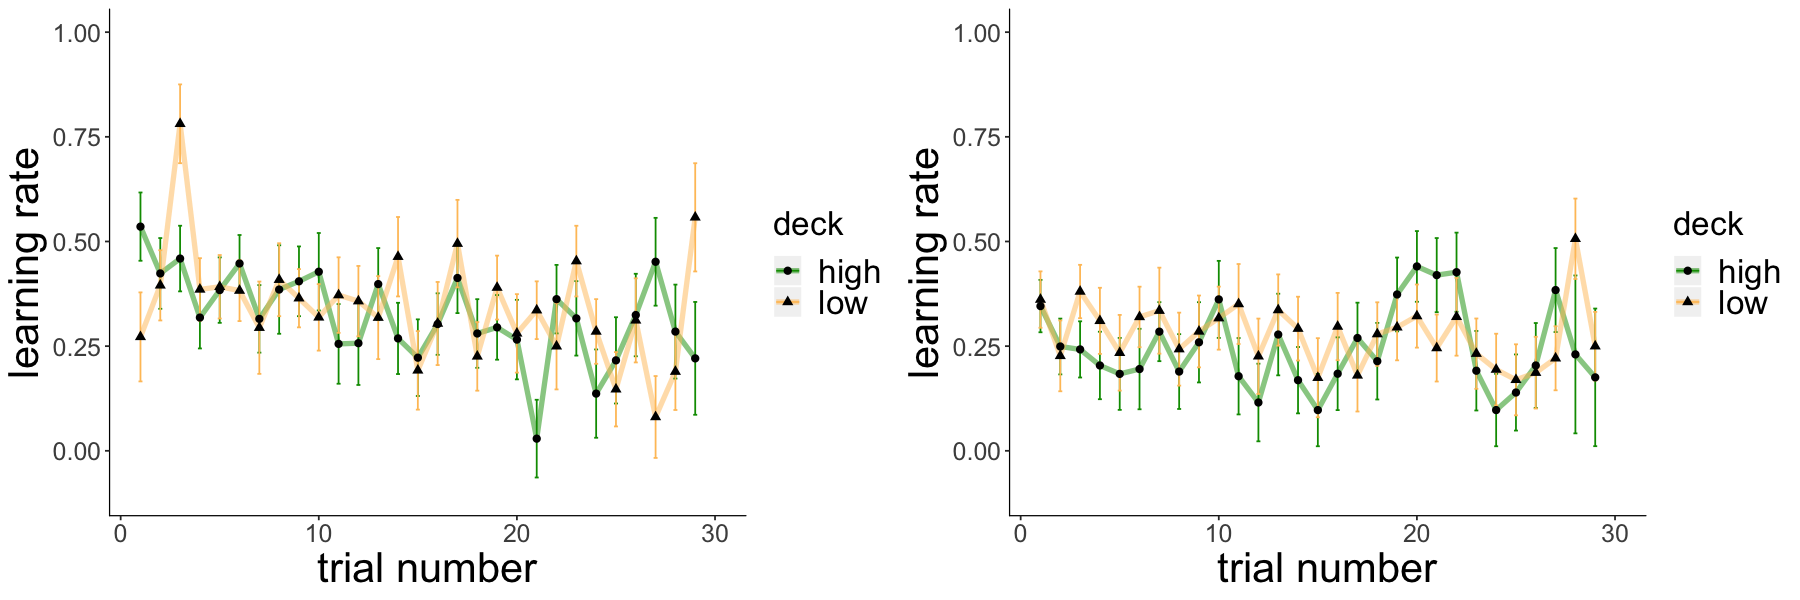

In [10]:
# set image size
options(repr.plot.width=15,repr.plot.height=5) # set image size using repr package

# CONDITION 1 (40-60)
exp2_c1_lr_means<-summarySE(exp2_c1_learning,measurevar="lr",groupvars=c("trialNum","deck"),na.rm=TRUE)

# fig 
p1<-ggplot(exp2_c1_lr_means,aes(x=trialNum,y=lr,color=deck,group=deck,shape=deck))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  geom_line(size=1.5,alpha=0.5)+
  scale_fill_manual(values=c("#009900","#ffc266"))+scale_colour_manual(values=c("#009900","#ffc266"))+
  geom_errorbar(mapping=aes(ymin=lr-se, ymax=lr+se),width=.2)+
  geom_point(size=2,color="black")+
  ylab("learning rate")+xlab("trial number")+ylim(-0.1,1)

# CONDITION 2 (20-80)
exp2_c2_lr_means<-summarySE(exp2_c2_learning,measurevar="lr",groupvars=c("trialNum","deck"),na.rm=TRUE)

# fig 
p2<-ggplot(exp2_c2_lr_means,aes(x=trialNum,y=lr,color=deck,group=deck,shape=deck))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  geom_line(size=1.5,alpha=0.5)+
  scale_fill_manual(values=c("#009900","#ffc266"))+scale_colour_manual(values=c("#009900","#ffc266"))+
  geom_errorbar(mapping=aes(ymin=lr-se, ymax=lr+se),width=.2)+
  geom_point(size=2,color="black")+
  ylab("learning rate")+xlab("trial number")+ylim(-0.1,1)

# plot fig
grid.arrange(p1,p2,ncol=2)

In [11]:
# analysis: learning rate ~ outcome PE 
absPElr<-lmer(scale(lr)~scale(out_absPE)+(1|subject),data=exp2_learning,control=lmerControl(optimizer="bobyqa"))
summary(absPElr)

# analysis: learning rate ~ cue PE 
cuePElr<-lmer(scale(lr)~scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_learning,control=lmerControl(optimizer="bobyqa"))
summary(cuePElr)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(lr) ~ scale(out_absPE) + (1 | subject)
   Data: exp2_learning
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 46053.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0854 -0.3098 -0.0271  0.4703  4.6282 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.008411 0.09171 
 Residual             0.987164 0.99356 
Number of obs: 16253, groups:  subject, 685

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      -1.528e-02  8.725e-03  7.447e+02  -1.751   0.0803 .  
scale(out_absPE)  7.397e-02  8.416e-03  1.296e+04   8.790   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scl(t_bsPE) -0.199

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(lr) ~ scale(cue_PE) + scale(cue_absPE) + (1 | subject)
   Data: exp2_learning
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 43519.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1327 -0.3065  0.0100  0.5665  4.5125 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.007359 0.08579 
 Residual             1.001197 1.00060 
Number of obs: 15285, groups:  subject, 685

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)      -2.150e-03  8.741e-03  6.892e+02  -0.246   0.8058  
scale(cue_PE)    -1.904e-02  8.254e-03  1.489e+04  -2.307   0.0211 *
scale(cue_absPE) -1.144e-02  8.472e-03  4.304e+03  -1.351   0.1769  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) scal(c_PE)
scale(c_PE)  0.000           
scl(c

## Learning comparisons across Experiment 2 conditions

In [12]:
# analysis: value separation ~ learning condition (40-60 or 20-80) * learning trial number 
absMod<-lmer(cue_absPE~condition*scale(trialNum)+(scale(trialNum)|subject),data=exp2_learning,control=lmerControl(optimizer="bobyqa"))
summary(absMod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: cue_absPE ~ condition * scale(trialNum) + (scale(trialNum) |  
    subject)
   Data: exp2_learning
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 160819.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3354 -0.5940 -0.0254  0.6020  4.7009 

Random effects:
 Groups   Name            Variance Std.Dev. Corr
 subject  (Intercept)      80.88    8.993       
          scale(trialNum)  18.22    4.268   0.32
 Residual                 216.27   14.706       
Number of obs: 19284, groups:  subject, 685

Fixed effects:
                            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                  20.3149     0.5176 682.8864   39.25  < 2e-16 ***
conditionc2                  18.6228     0.7199 682.6510   25.87  < 2e-16 ***
scale(trialNum)               0.9937     0.2847 682.0297    3.49 0.000513 ***
conditionc2:scale(trialNum)   5.398

In [13]:
# analysis: distance from true mean ~ memory condition * learning trial number 
errMod<-lmer(absErr~memoryType*scale(trialNum)+(scale(trialNum)|subject),data=exp2_learning,control=lmerControl(optimizer="bobyqa"))
summary(errMod)

# analysis: value estimate ~ memory condition
valMod<-lmer(estimate~memoryType+(1|subject),data=exp2_learning,control=lmerControl(optimizer="bobyqa"))
summary(valMod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: absErr ~ memoryType * scale(trialNum) + (scale(trialNum) | subject)
   Data: exp2_learning
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 162886.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1181 -0.6249 -0.1223  0.3948  5.0615 

Random effects:
 Groups   Name            Variance Std.Dev. Corr 
 subject  (Intercept)      43.291   6.580        
          scale(trialNum)   3.922   1.981   -0.02
 Residual                 155.608  12.474        
Number of obs: 20415, groups:  subject, 685

Fixed effects:
                                   Estimate Std. Error       df t value
(Intercept)                         11.6788     0.3828 682.9594  30.505
memoryTypeimplicit                   4.3481     0.5326 682.9518   8.164
scale(trialNum)                     -1.9632     0.1664 683.2085 -11.799
memoryTypeimplicit:scale(trialNum)   0.4802     0.2314 682.4493

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: estimate ~ memoryType + (1 | subject)
   Data: exp2_learning
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 182585.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.61417 -0.79452  0.00926  0.69867  2.77304 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  19.06    4.365  
 Residual             436.11   20.883  
Number of obs: 20415, groups:  subject, 685

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         48.5428     0.3190 682.2338 152.148  < 2e-16 ***
memoryTypeimplicit  -1.1744     0.4438 682.1908  -2.646  0.00833 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
mmryTypmplc -0.719

# Reinforcement Learning Models

## Experiment 1 

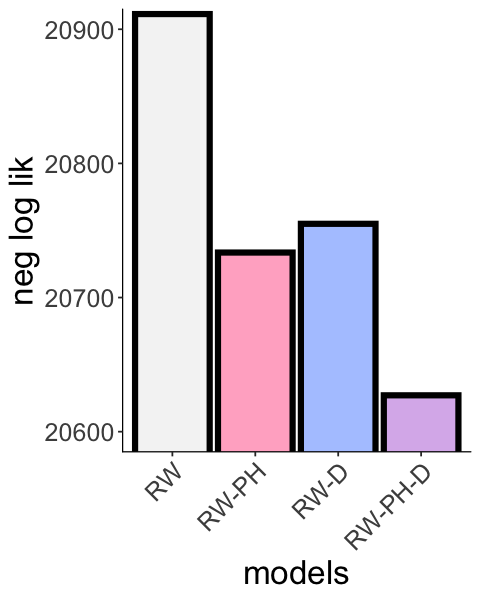

In [14]:
# set image size 
options(repr.plot.width=4,repr.plot.height=5)

# model likelihood sums 
exp1_liks_df<-exp1_liks[c(2:5)]
exp1_liks_sums<-as.data.frame(colSums(exp1_liks_df))
exp1_liks_sums$model<-rownames(exp1_liks_sums)
colnames(exp1_liks_sums)[1]<-c("liks")

# rename and reposition 
exp1_liks_sums$model<-c("RW","RW-D","RW-PH","RW-PH-D") 
positions<-c("RW","RW-PH","RW-D","RW-PH-D")

# plot fig 
ggplot(exp1_liks_sums,aes(x=model,y=liks,fill=model))+
  geom_bar(stat="identity",alpha=0.3,width=0.9)+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.9,size=1.75)+
  scale_fill_manual(values=c("gray89","#0066FF","#FF0066","#9933CC"))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=45,hjust=1),legend.text=element_text(size=20),legend.title=element_text(size=20),legend.position = "none")+
  ylab("neg log lik")+xlab("models")+coord_cartesian(ylim=c(20900,20600))+scale_x_discrete(limits = positions)

In [15]:
# calculate critical values given number of parameters  
nParams = seq(1,3)

CVs<-array(0,c(3,2))

for (i in 1:length(nParams)) {
  CVs[i,1] = nParams[i]
  df = length(exp1_liks$subs)*nParams[i]
  CVs[i,2] = qchisq(p=.05, df=df,lower.tail=FALSE)/2
}

colnames(CVs)<-c('nParams','CVs')
CVs

# calculate likelihood ratio test, compared to winning model (RW-PH-D)  
mParams = c(1,3,2)

ps<-array(0,c(length(mParams),5))
nSubs = length(exp1_liks$subs)

for (i in 1:length(mParams)){
  ps[i,1] = colnames(exp1_liks_df)[i]
  ps[i,2] = mParams[i]
  df = nSubs*4 - nSubs*mParams[i]
  ps[i,3] = df
  q = -2*(sum(exp1_liks_df$lik_RW.PH.D)-sum(exp1_liks_df[,i]))
  ps[i,4] = q
  ps[i,5] = pchisq(q,df,lower.tail=FALSE)
}

colnames(ps)<-c('model','nParams','df','CVs','p-values')
ps

nParams,CVs
1,51.50475
2,96.35003
3,140.18120


model,nParams,df,CVs,p-values
lik_RW,1,243,568.445779599999,3.98828689910004e-28
lik_RW.D,3,81,255.706667599996,5.47313016833184e-20
lik_RW.PH,2,162,212.866027199998,0.00451531930264941


## Experiment 2 

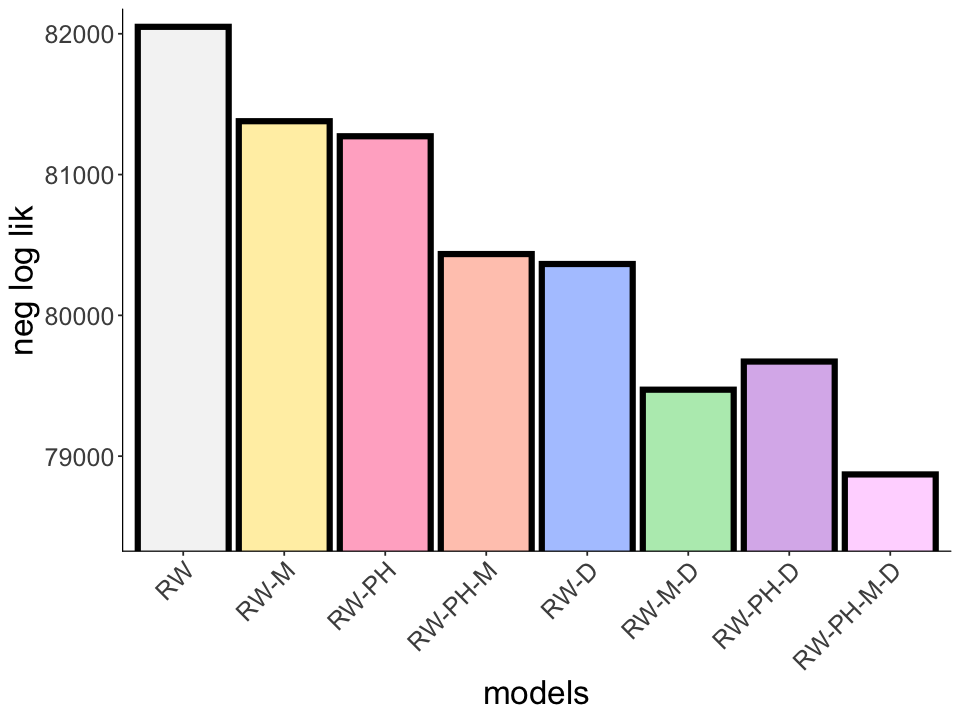

In [16]:
# set image size 
options(repr.plot.width=8,repr.plot.height=6)

# model likelihood sums 
exp2_liks_df<-exp2_liks[c(2:9)]
exp2_liks_sums<-as.data.frame(colSums(exp2_liks_df))
exp2_liks_sums$model<-rownames(exp2_liks_sums)
colnames(exp2_liks_sums)[1]<-c("liks")

# rename and reposition 
exp2_liks_sums$model<-c("RW","RW-D","RW-PH","RW-M","RW-PH-M","RW-PH-D","RW-M-D","RW-PH-M-D")
positions<-c("RW","RW-M","RW-PH","RW-PH-M","RW-D","RW-M-D","RW-PH-D","RW-PH-M-D")

# plot fig
ggplot(exp2_liks_sums,aes(x=model,y=liks,fill=model))+
  geom_bar(stat="identity",alpha=0.3,width=0.9)+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.9,size=1.75)+
  scale_fill_manual(values=c("gray89","#0066FF","gold1","#00CC33","#FF0066","#9933CC","#FF6633","#FF99FF"))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=45,hjust=1),legend.text=element_text(size=20),legend.title=element_text(size=20),legend.position = "none")+
  ylab("neg log lik")+xlab("models")+coord_cartesian(ylim=c(78500,82000))+scale_x_discrete(limits = positions)

In [17]:
# calculate critical values given number of parameters  
nParams = seq(1,4)

CVs<-array(0,c(length(nParams),2))

for (i in 1:length(nParams)) {
  CVs[i,1] = nParams[i]
  df = length(exp2_liks$subs)*nParams[i]
  CVs[i,2] = qchisq(p=.05, df=df,lower.tail=FALSE)/2
}

colnames(CVs)<-c('nParams','CVs')
CVs

# calculate likelihood ratio test, compared to winning model (RW-PH-M-D) 
mParams = c(1,3,2,2,3,4,4)

ps<-array(0,c(length(mParams),5))
nSubs = length(exp2_liks$subs)

for (i in 1:length(mParams)){
  ps[i,1] = colnames(exp2_liks_df)[i]
  ps[i,2] = mParams[i]
  df = nSubs*5 - nSubs*mParams[i]
  ps[i,3] = df
  q = -2*(sum(exp2_liks_df$lik_RW.PH.M.D)-sum(exp2_liks_df[,i]))
  ps[i,4] = q
  ps[i,5] = pchisq(q,df,lower.tail=FALSE)
}

colnames(ps)<-c('model','nParams','df','CVs','p-values')
ps

nParams,CVs
1,373.4987
2,728.6109
3,1080.7876
4,1431.4450


model,nParams,df,CVs,p-values
lik_RW,1,2740,6358.34076700002,1.15176399821606e-287
lik_RW.D,3,1370,2989.17533500001,4.06546060714664e-122
lik_RW.PH,2,2055,4803.8592645,9.56630376499942e-221
lik_RW.M,2,2055,5017.64800178001,9.00691318814854e-248
lik_RW.PH.M,3,1370,3130.53494509999,4.19788397343649e-139
lik_RW.PH.D,4,685,1603.55347460002,1.82023985376574e-75
lik_RW.M.D,4,685,1203.78650384001,4.58643433997965e-31


## model learning rates (supplemental)

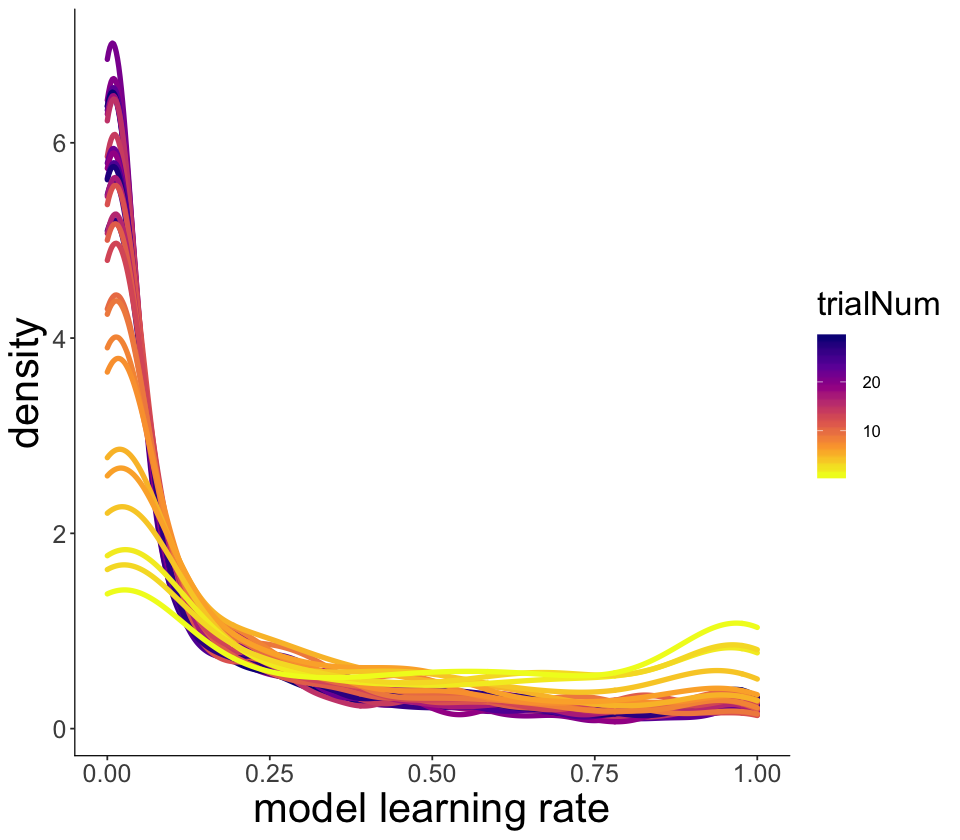

In [18]:
# set image size 
options(repr.plot.width=8,repr.plot.height=7)

# plot ridge distributions 
exp2_learning_lrPlot<-exp2_learning[exp2_learning$trialNum!=30,]

ggplot(exp2_learning_lrPlot, aes(x = absCueD_lr, group = trialNum, color=trialNum, height = stat(density))) + 
  geom_density_ridges(scale=0.9,stat="density",size=1.5)+xlim(0,1)+scale_color_viridis_c(option = "plasma",direction=-1)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=10),legend.title=element_text(size=20))+
  xlab('model learning rate')

## confusion matrix (supplemental)

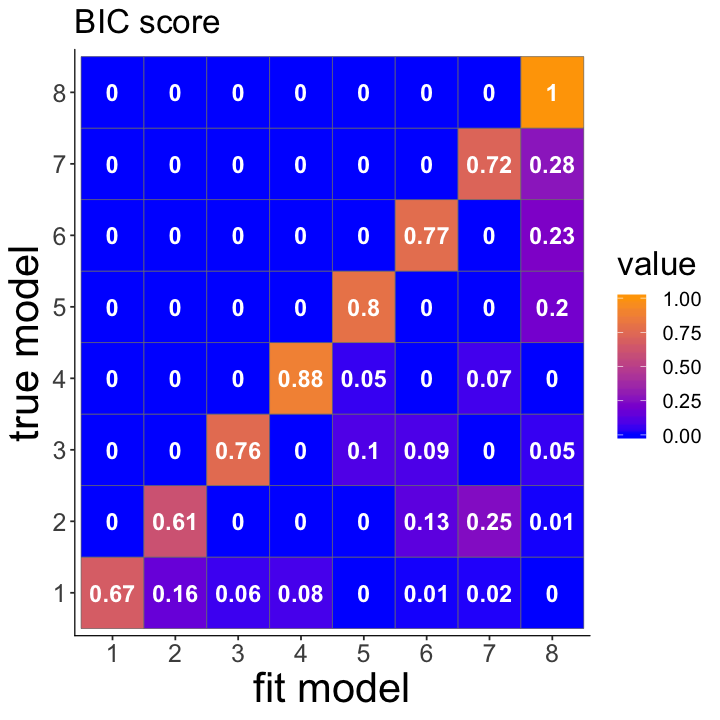

In [19]:
# set image size 
options(repr.plot.width=6,repr.plot.height=6) 

# format matrix
meltBic<-melt(confMat_BIC)
meltBic$Var2<-gsub('V','',meltBic$Var2)

# figs 
ggplot(meltBic, aes(x = as.factor(Var1), y = as.factor(Var2))) + 
  geom_raster(aes(fill=value)) + geom_tile(aes(fill=value),color="grey50",size=0.2)+
  scale_fill_gradient(low="blue",high="orange") +
  labs(title="BIC score",x="fit model",y="true model") +
  theme(plot.title=element_text(size=20),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=12),legend.title=element_text(size=20))+
  geom_text(size=5,fontface='bold',color='white',aes(label=value)) 

# Memory by Condition

## Experiment 1

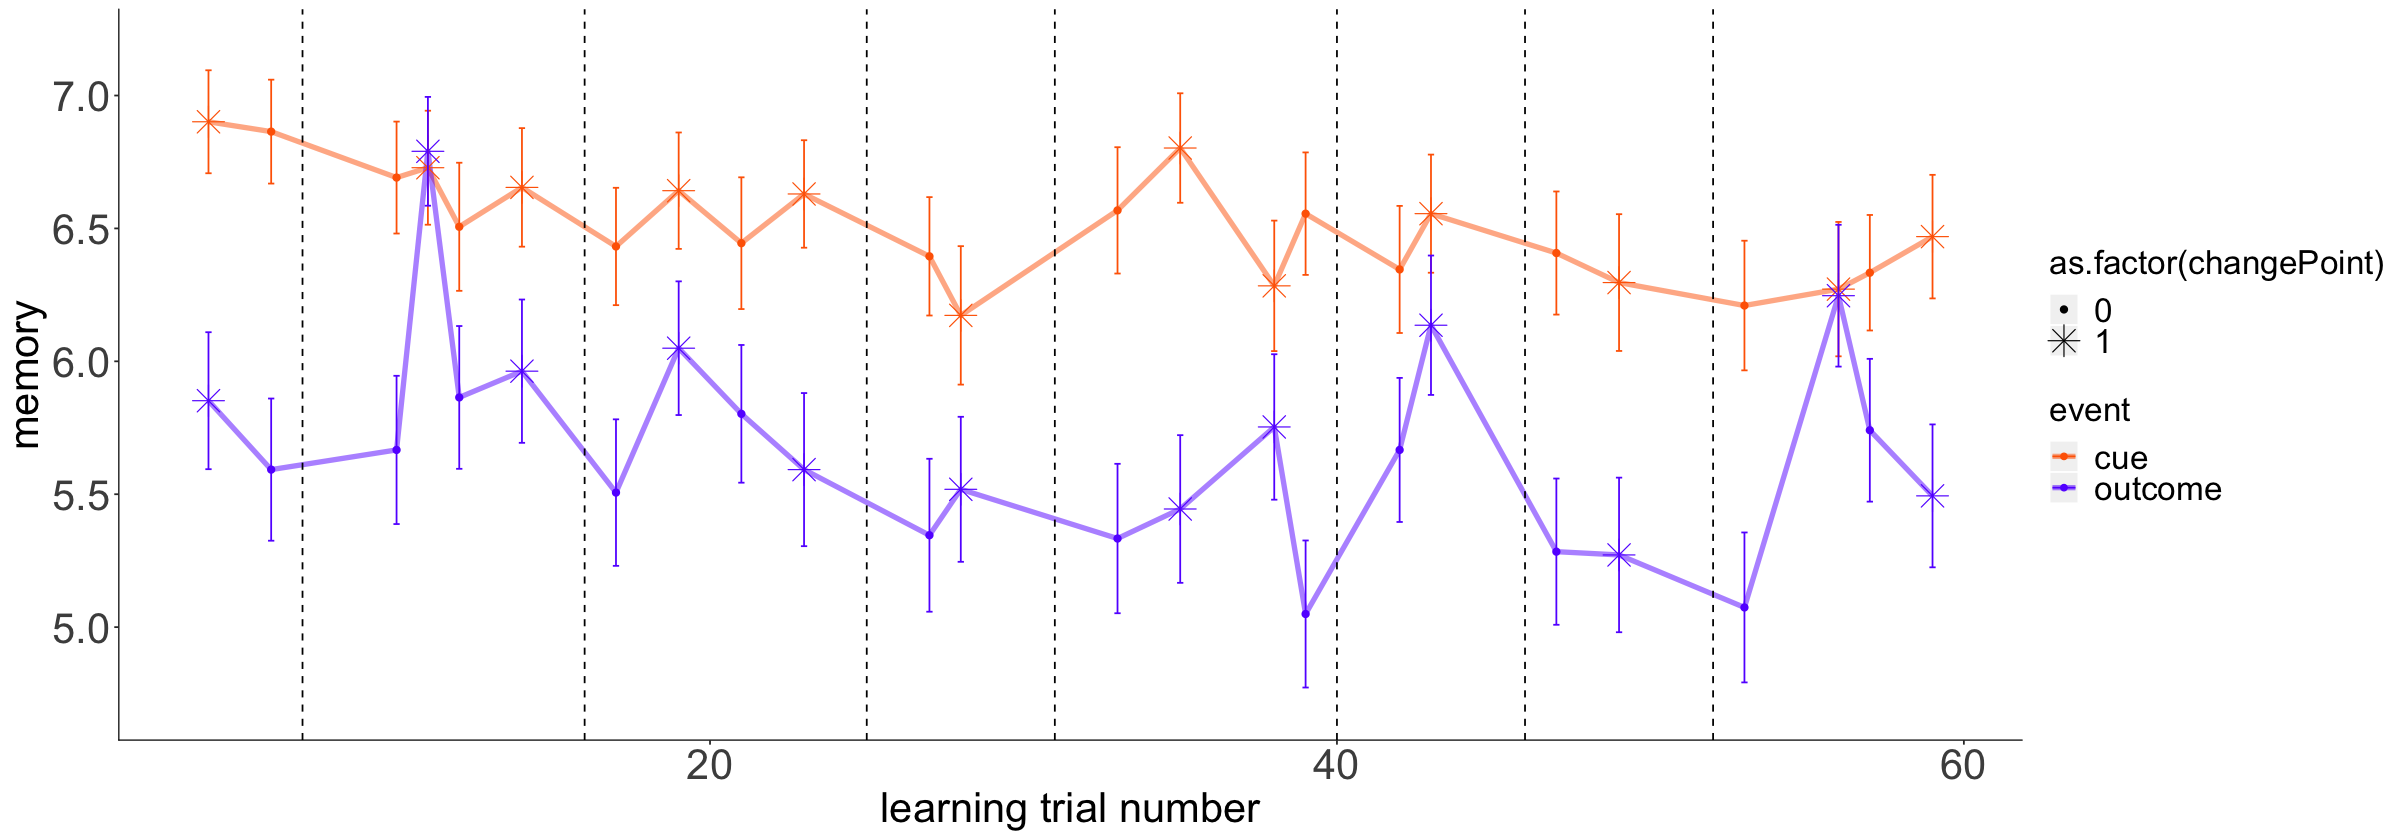

In [20]:
# set image size 
options(repr.plot.width=20,repr.plot.height=7)

exp1_memory_means<-summarySE(exp1_memory,measurevar="confHit",groupvars=c("trialNumLearn","event","changePoint"),na.rm=TRUE)

ggplot(exp1_memory_means,aes(x=trialNumLearn,y=confHit,color=event,fill=event,group=event,shape=as.factor(changePoint)))+
  geom_line(size=1.5,alpha=0.5)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+ylim(4.7,7.2)+
  scale_shape_manual(values=c(16,8))+scale_size_manual(values=c(2,6))+ 
  geom_point(aes(shape=as.factor(changePoint),size=as.factor(changePoint)))+
  geom_vline(xintercept=7,linetype="dashed",colour="black")+geom_vline(xintercept=16,linetype="dashed",colour="black")+geom_vline(xintercept=25,linetype="dashed",colour="black")+geom_vline(xintercept=31,linetype="dashed",colour="black")+
  geom_vline(xintercept=40,linetype="dashed",colour="black")+geom_vline(xintercept=46,linetype="dashed",colour="black")+geom_vline(xintercept=52,linetype="dashed",colour="black")+
  geom_errorbar(aes(x=trialNumLearn,ymin=confHit-se, ymax=confHit+se),width=.2)+
  xlab("learning trial number")+ylab("memory")

In [21]:
# analysis: memory ~ risk (high or low variance) * event type (cue or outcome) 
cueOutRisk<-lmer(confHit~risk*event+(risk+event|subject),data=exp1_memory,control=lmerControl(optimizer="bobyqa"))
summary(cueOutRisk)

# analysis: memory ~ risk (high or low variance) for cue events 
cueRisk<-lmer(confHit~risk+(risk|subject),data=exp1_memory[exp1_memory$event=='cue',],control=lmerControl(optimizer="bobyqa"))
summary(cueRisk)

# analysis: memory ~ risk (high or low variance) for outcome events 
outRisk<-lmer(confHit~risk+(risk|subject),data=exp1_memory[exp1_memory$event=='outcome',],control=lmerControl(optimizer="bobyqa"))
summary(outRisk)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ risk * event + (risk + event | subject)
   Data: exp1_memory
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 16988.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1286 -0.6724  0.3094  0.6917  2.3596 

Random effects:
 Groups   Name         Variance Std.Dev. Corr       
 subject  (Intercept)  0.5292   0.7274              
          risklow      0.2340   0.4837   -0.31      
          eventoutcome 0.1814   0.4259    0.52 -0.26
 Residual              4.3484   2.0853              
Number of obs: 3888, groups:  subject, 81

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             6.4444     0.1049   99.0925  61.427  < 2e-16 ***
risklow                 0.1245     0.1088  205.0961   1.144   0.2539    
eventoutcome           -0.6523     0.1058  220.0066  -6.167  3.3e-09 ***
risklow:eventoutc

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ risk + (risk | subject)
   Data: exp1_memory[exp1_memory$event == "cue", ]
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 8191.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2932 -0.3136  0.3449  0.6593  1.5262 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subject  (Intercept) 0.52311  0.7233        
          risklow     0.01673  0.1294   -0.23
 Residual             3.71432  1.9273        
Number of obs: 1944, groups:  subject, 81

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   6.4444     0.1014 80.0000  63.562   <2e-16 ***
risklow       0.1245     0.0886 80.0001   1.405    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
risklow -0.455

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ risk + (risk | subject)
   Data: exp1_memory[exp1_memory$event == "outcome", ]
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 8816.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7258 -0.8777  0.3056  0.7741  2.1178 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subject  (Intercept) 0.9441   0.9716        
          risklow     0.3091   0.5560   -0.23
 Residual             5.0191   2.2403        
Number of obs: 1944, groups:  subject, 81

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   5.7922     0.1297 80.0000  44.662   <2e-16 ***
risklow      -0.2479     0.1189 80.0000  -2.085   0.0403 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
risklow -0.432

In [22]:
# analysis: memory ~ event type (cue or outcome) * learning trial number
cueOutTrial<-lmer(confHit~scale(trialNumLearn)*event+(scale(trialNumLearn)+event|subject),data=exp1_memory,control=lmerControl(optimizer="bobyqa"))
summary(cueOutTrial)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event + (scale(trialNumLearn) +  
    event | subject)
   Data: exp1_memory
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 16979.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1571 -0.6707  0.3072  0.7005  2.5526 

Random effects:
 Groups   Name                 Variance Std.Dev. Corr     
 subject  (Intercept)          0.47914  0.6922            
          scale(trialNumLearn) 0.04574  0.2139   0.36     
          eventoutcome         0.18091  0.4253   0.45 0.84
 Residual                      4.35427  2.0867            
Number of obs: 3888, groups:  subject, 81

Fixed effects:
                                    Estimate Std. Error         df t value
(Intercept)                        6.507e+00  9.031e-02  8.000e+01  72.052
scale(trialNumLearn)              -1.332e-01  5.296e-02  2.196e+02  -2.515
eventoutcome    

## Experiment 2: explicit

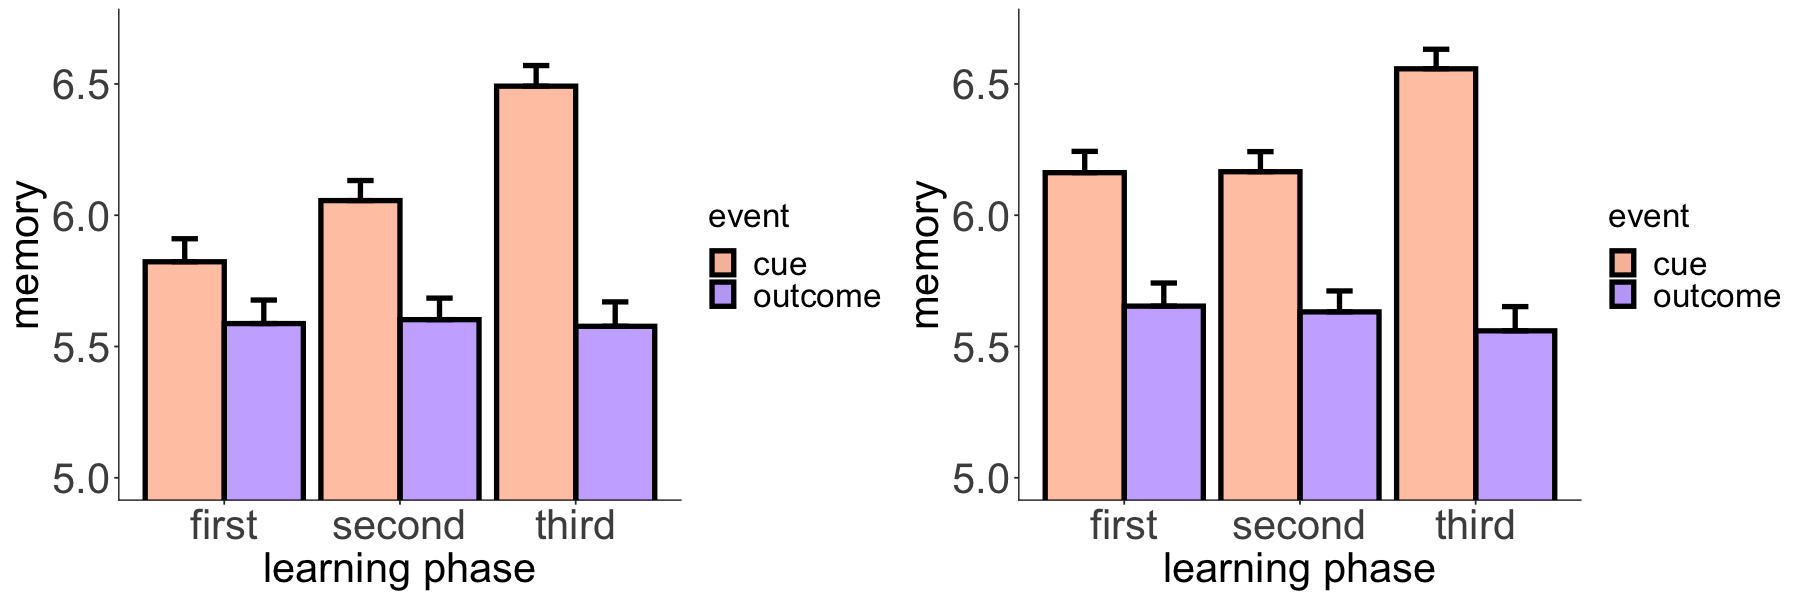

In [23]:
# set image size 
options(repr.plot.width=15,repr.plot.height=5)

# CONDITION 1 (40-60)
exp2_mem_explicit_c1_means <- summarySEwithin(exp2_mem_explicit_c1, measurevar="confHit", withinvars=c("thirds","event"),idvar="subject", na.rm=TRUE, conf.interval=.95)

p1<-ggplot(exp2_mem_explicit_c1_means,aes(x=thirds,y=confHit,fill=event))+
  geom_errorbar(aes(ymin=confHit, ymax=confHit+se,width=0.3),size=1.5,position=position_dodge(0.9))+
  geom_bar(stat="identity",alpha=0.3,width=0.9,position=position_dodge(0.9))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.9,size=1.5,position=position_dodge(0.9))+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+     
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  ylab("memory")+coord_cartesian(ylim=c(5,6.7))+xlab("learning phase")

# CONDITION 2 (20-80)
exp2_mem_explicit_c2_means <- summarySEwithin(exp2_mem_explicit_c2, measurevar="confHit", withinvars=c("thirds","event"),idvar="subject", na.rm=TRUE, conf.interval=.95)

p2<-ggplot(exp2_mem_explicit_c2_means,aes(x=thirds,y=confHit,fill=event))+
  geom_errorbar(aes(ymin=confHit, ymax=confHit+se,width=0.3),size=1.5,position=position_dodge(0.9))+
  geom_bar(stat="identity",alpha=0.3,width=0.9,position=position_dodge(0.9))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.9,size=1.5,position=position_dodge(0.9))+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+     
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  ylab("memory")+coord_cartesian(ylim=c(5,6.7))+xlab("learning phase")

grid.arrange(p1,p2,ncol=2)

In [24]:
# analysis: memory ~ event type (cue or outcome) * learning trial number

# condition 1 (40-60)
cueOutTrial_c1_exp<-lmer(confHit~scale(trialNumLearn)*event+(scale(trialNumLearn)+event|subject),data=exp2_mem_explicit_c1,control=lmerControl(optimizer="bobyqa"))
summary(cueOutTrial_c1_exp)

# condition 2 (20-80)
cueOutTrial_c2_exp<-lmer(confHit~scale(trialNumLearn)*event+(scale(trialNumLearn)+event|subject),data=exp2_mem_explicit_c2,control=lmerControl(optimizer="bobyqa"))
summary(cueOutTrial_c2_exp)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event + (scale(trialNumLearn) +  
    event | subject)
   Data: exp2_mem_explicit_c1
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 23714.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7344 -0.8753  0.3476  0.7237  2.3060 

Random effects:
 Groups   Name                 Variance Std.Dev. Corr       
 subject  (Intercept)          0.70696  0.8408              
          scale(trialNumLearn) 0.06591  0.2567   -0.15      
          eventoutcome         0.17018  0.4125    0.23 -0.13
 Residual                      5.20176  2.2807              
Number of obs: 5198, groups:  subject, 163

Fixed effects:
                                    Estimate Std. Error         df t value
(Intercept)                          6.11977    0.07961  162.08298  76.869
scale(trialNumLearn)                 0.25012    0.04904  465.59739   5.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event + (scale(trialNumLearn) +  
    event | subject)
   Data: exp2_mem_explicit_c2
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 24235.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9157 -0.8110  0.3451  0.7021  2.1040 

Random effects:
 Groups   Name                 Variance Std.Dev. Corr       
 subject  (Intercept)          0.67674  0.8226              
          scale(trialNumLearn) 0.08802  0.2967   -0.14      
          eventoutcome         0.44208  0.6649   -0.24  0.44
 Residual                      4.97144  2.2297              
Number of obs: 5356, groups:  subject, 168

Fixed effects:
                                    Estimate Std. Error         df t value
(Intercept)                          6.28684    0.07673  166.91819  81.936
scale(trialNumLearn)                 0.16781    0.04882  438.95711   3.

## Experiment 2: implicit 

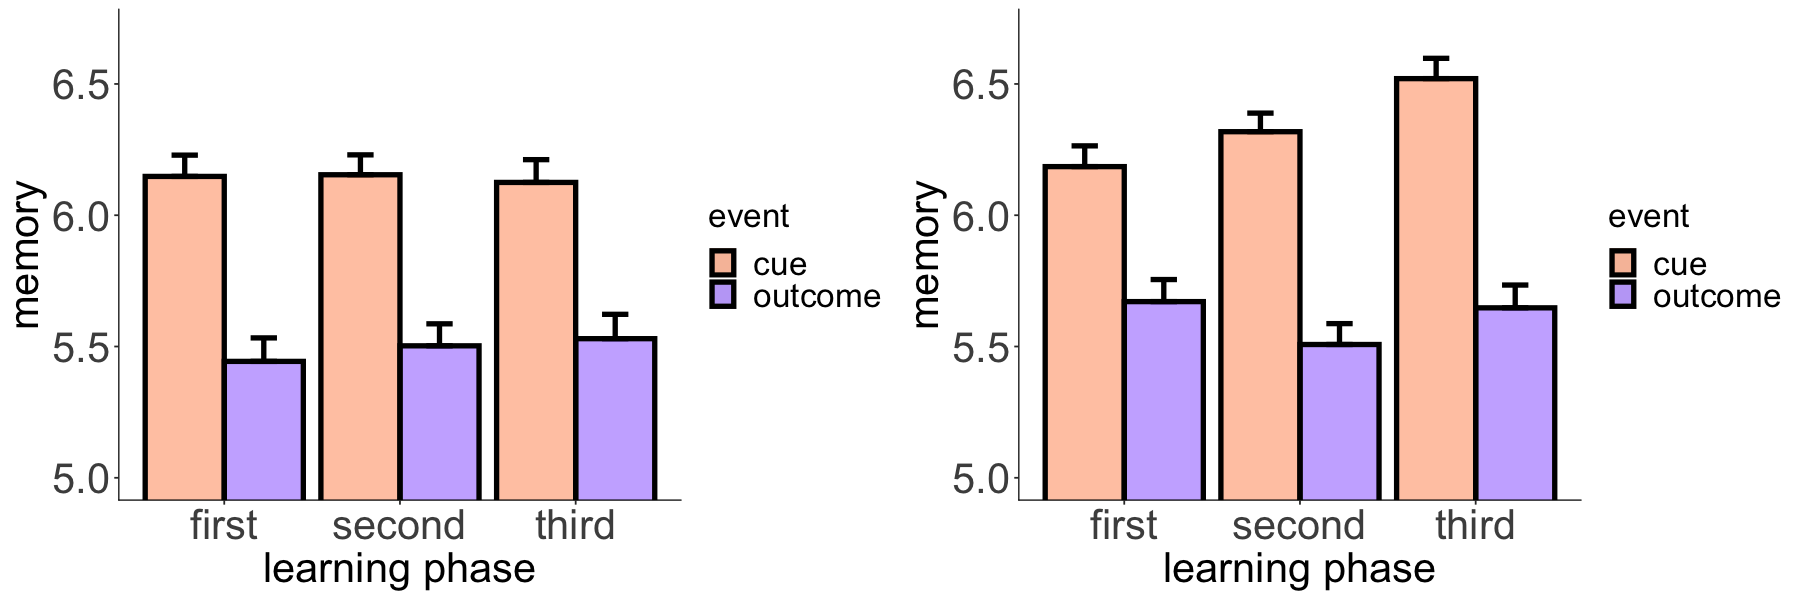

In [25]:
# set image size 
options(repr.plot.width=15,repr.plot.height=5)

# CONDITION 1 (40-60)
exp2_mem_implicit_c1_means <- summarySEwithin(exp2_mem_implicit_c1, measurevar="confHit", withinvars=c("thirds","event"),idvar="subject", na.rm=TRUE, conf.interval=.95)

p1<-ggplot(exp2_mem_implicit_c1_means,aes(x=thirds,y=confHit,fill=event))+
  geom_errorbar(aes(ymin=confHit, ymax=confHit+se,width=0.3),size=1.5,position=position_dodge(0.9))+
  geom_bar(stat="identity",alpha=0.3,width=0.9,position=position_dodge(0.9))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.9,size=1.5,position=position_dodge(0.9))+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+     
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  ylab("memory")+coord_cartesian(ylim=c(5,6.7))+xlab("learning phase")

# CONDITION 2 (20-80)
exp2_mem_implicit_c2_means <- summarySEwithin(exp2_mem_implicit_c2, measurevar="confHit", withinvars=c("thirds","event"),idvar="subject", na.rm=TRUE, conf.interval=.95)

p2<-ggplot(exp2_mem_implicit_c2_means,aes(x=thirds,y=confHit,fill=event))+
  geom_errorbar(aes(ymin=confHit, ymax=confHit+se,width=0.3),size=1.5,position=position_dodge(0.9))+
  geom_bar(stat="identity",alpha=0.3,width=0.9,position=position_dodge(0.9))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.9,size=1.5,position=position_dodge(0.9))+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+     
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))+
  ylab("memory")+coord_cartesian(ylim=c(5,6.7))+xlab("learning phase")

grid.arrange(p1,p2,ncol=2)


In [26]:
# analysis: memory ~ event type (cue or outcome) * learning trial number

# condition 1 (40-60)
cueOutTrial_c1_imp<-lmer(confHit~scale(trialNumLearn)*event+(scale(trialNumLearn)+event|subject),data=exp2_mem_implicit_c1,control=lmerControl(optimizer="bobyqa"))
summary(cueOutTrial_c1_imp)

## check three-way interaction for this result
mod<-lmer(confHit~scale(trialNumLearn)*event*memoryType+(1|subject),data=exp2_mem_c1,control=lmerControl(optimizer="bobyqa"))
summary(mod)

# condition 2 (20-80)
cueOutTrial_c2_imp<-lmer(confHit~scale(trialNumLearn)*event+(scale(trialNumLearn)+event|subject),data=exp2_mem_implicit_c2,control=lmerControl(optimizer="bobyqa"))
summary(cueOutTrial_c2_imp)

## check three-way interaction for this result
mod<-lmer(confHit~scale(trialNumLearn)*event*memoryType+(1|subject),data=exp2_mem_c2,control=lmerControl(optimizer="bobyqa"))
summary(mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event + (scale(trialNumLearn) +  
    event | subject)
   Data: exp2_mem_implicit_c1
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 24407.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7531 -0.8528  0.3541  0.7275  2.2468 

Random effects:
 Groups   Name                 Variance Std.Dev. Corr       
 subject  (Intercept)          0.82172  0.9065              
          scale(trialNumLearn) 0.08301  0.2881   -0.11      
          eventoutcome         0.34379  0.5863   -0.29  0.33
 Residual                      5.31061  2.3045              
Number of obs: 5319, groups:  subject, 168

Fixed effects:
                                    Estimate Std. Error         df t value
(Intercept)                        6.142e+00  8.301e-02  1.667e+02  73.985
scale(trialNumLearn)              -8.393e-03  4.997e-02  4.493e+02  -0.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event * memoryType + (1 | subject)
   Data: exp2_mem_c1
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 48175.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9204 -0.8792  0.3678  0.7371  2.3053 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.7868   0.887   
 Residual             5.3993   2.324   
Number of obs: 10517, groups:  subject, 331

Fixed effects:
                                                       Estimate Std. Error
(Intercept)                                           6.120e+00  8.309e-02
scale(trialNumLearn)                                  2.498e-01  4.553e-02
eventoutcome                                         -5.300e-01  6.446e-02
memoryTypeimplicit                                    2.159e-02  1.167e-01
scale(trialNumLearn):eventoutcome                    -2.372

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event + (scale(trialNumLearn) +  
    event | subject)
   Data: exp2_mem_implicit_c2
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 26735.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7812 -0.8112  0.3893  0.6988  2.6619 

Random effects:
 Groups   Name                 Variance Std.Dev. Corr       
 subject  (Intercept)          0.47862  0.6918              
          scale(trialNumLearn) 0.06727  0.2594   -0.30      
          eventoutcome         0.40287  0.6347    0.10  0.37
 Residual                      5.14917  2.2692              
Number of obs: 5874, groups:  subject, 186

Fixed effects:
                                    Estimate Std. Error         df t value
(Intercept)                          6.33926    0.06578  185.04792  96.377
scale(trialNumLearn)                 0.15604    0.04599  528.78713   3.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(trialNumLearn) * event * memoryType + (1 | subject)
   Data: exp2_mem_c2
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 51076

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8953 -0.8489  0.3725  0.7349  2.4651 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6316   0.7947  
 Residual             5.2519   2.2917  
Number of obs: 11230, groups:  subject, 354

Fixed effects:
                                                       Estimate Std. Error
(Intercept)                                           6.287e+00  7.565e-02
scale(trialNumLearn)                                  1.680e-01  4.428e-02
eventoutcome                                         -6.712e-01  6.263e-02
memoryTypeimplicit                                    5.283e-02  1.044e-01
scale(trialNumLearn):eventoutcome                    -2.010e-

## Individual differences in learning performance and memory effects

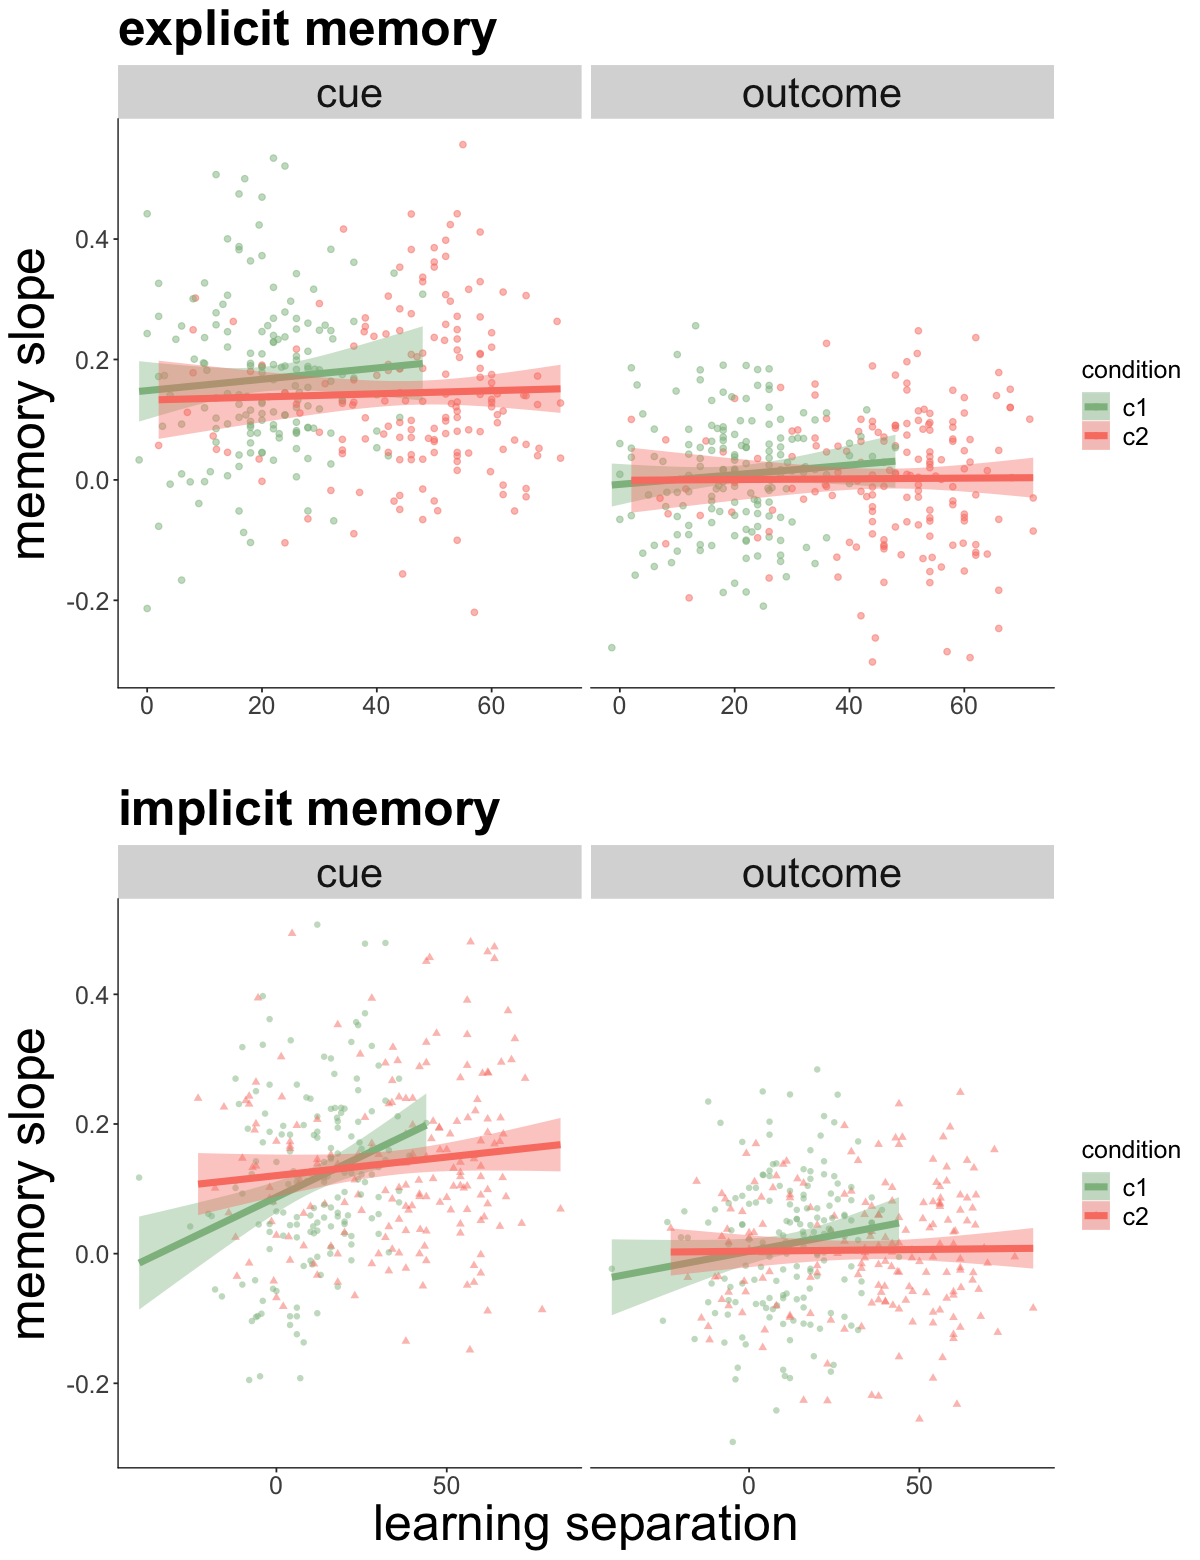

In [27]:
# re-arrange factors, c1 = 40-60 condition, c2 = 20-80 condition 
exp2_indDiff_slopes$condition <- factor(exp2_indDiff_slopes$condition, c("c2", "c1"))

# set image size 
options(repr.plot.width=10,repr.plot.height=13)

# plot slope relationship 
p1<-ggplot(exp2_indDiff_slopes_exp) + aes(x = avgDiff, y = memorySlope, color = condition, fill = condition) + facet_wrap(~event) +
  geom_point(alpha=0.5) + geom_smooth(method = "lm",size=2) + scale_fill_manual(values=c("#8FBC8F","#FA8072"))+scale_colour_manual(values=c("#8FBC8F","#FA8072"))+xlab('')+ylab('memory slope') +ggtitle('explicit memory')+ 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25))
p2<-ggplot(exp2_indDiff_slopes_imp) + aes(x = avgDiff, y = memorySlope, color = condition, fill = condition, shape = condition) + facet_wrap(~event) + ylab('memory slope') + xlab('learning separation')+ggtitle('implicit memory')+ 
  geom_point(alpha=0.5) + geom_smooth(method = "lm",size=2) +   scale_fill_manual(values=c("#8FBC8F","#FA8072"))+scale_colour_manual(values=c("#8FBC8F","#FA8072"))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25))

grid.arrange(p1,p2,nrow=2)

In [28]:
# analysis, individual differences: memory change over learning ~ learning performance * event type (cue or outcome) 
cueOutSlope<-lm(memorySlope~scale(avgDiff)*event,data=exp2_indDiff_slopes)
summary(cueOutSlope)

# analysis, individual differences: cue memory change over learning ~ learning performance 
cueSlopes<-lm(memorySlope~scale(avgDiff),data=exp2_indDiff_slopes[exp2_indDiff_slopes$event=='cue',])
summary(cueSlopes)

# analysis, individual differences: outcome memory change over learning ~ learning performance 
outSlopes<-lm(memorySlope~scale(avgDiff),data=exp2_indDiff_slopes[exp2_indDiff_slopes$event=='outcome',])
summary(outSlopes)


Call:
lm(formula = memorySlope ~ scale(avgDiff) * event, data = exp2_indDiff_slopes)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38159 -0.07763 -0.00236  0.07387  0.39753 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  0.141499   0.004463  31.704  < 2e-16 ***
scale(avgDiff)               0.015350   0.004465   3.438 0.000604 ***
eventoutcome                -0.133827   0.006312 -21.203  < 2e-16 ***
scale(avgDiff):eventoutcome -0.014435   0.006314  -2.286 0.022395 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1168 on 1366 degrees of freedom
Multiple R-squared:  0.2525,	Adjusted R-squared:  0.2509 
F-statistic: 153.8 on 3 and 1366 DF,  p-value: < 2.2e-16



Call:
lm(formula = memorySlope ~ scale(avgDiff), data = exp2_indDiff_slopes[exp2_indDiff_slopes$event == 
    "cue", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38159 -0.08608 -0.01274  0.08061  0.39753 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.141499   0.004997  28.316  < 2e-16 ***
scale(avgDiff) 0.015355   0.005001   3.071  0.00222 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1308 on 683 degrees of freedom
Multiple R-squared:  0.01362,	Adjusted R-squared:  0.01217 
F-statistic: 9.428 on 1 and 683 DF,  p-value: 0.002221



Call:
lm(formula = memorySlope ~ scale(avgDiff), data = exp2_indDiff_slopes[exp2_indDiff_slopes$event == 
    "outcome", ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.310705 -0.068760  0.005961  0.068970  0.276802 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    0.0076719  0.0038559   1.990    0.047 *
scale(avgDiff) 0.0009146  0.0038587   0.237    0.813  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1009 on 683 degrees of freedom
Multiple R-squared:  8.225e-05,	Adjusted R-squared:  -0.001382 
F-statistic: 0.05618 on 1 and 683 DF,  p-value: 0.8127


In [29]:
# analysis, individual differences: 
# cue memory change over learning ~ learning performance * memory condition (explicit or implicit)
memSlopes<-lm(memorySlope~scale(avgDiff)*memoryType,data=exp2_indDiff_slopes_cue)
summary(memSlopes)

# analysis, individual differences: explicit cue memory change over learning ~ learning performance 
cueExpSlopes<-lm(memorySlope~scale(avgDiff),data=exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$memoryType=='explicit',])
summary(cueExpSlopes)

# analysis, individual differences: implicit cue memory change over learning ~ learning performance 
cueImpSlopes<-lm(memorySlope~scale(avgDiff),data=exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$memoryType=='implicit',])
summary(cueImpSlopes)


Call:
lm(formula = memorySlope ~ scale(avgDiff) * memoryType, data = exp2_indDiff_slopes_cue)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37761 -0.08248 -0.00892  0.08395  0.40609 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        0.157177   0.007441  21.124  < 2e-16 ***
scale(avgDiff)                    -0.005270   0.008591  -0.613  0.53981    
memoryTypeimplicit                -0.023969   0.010253  -2.338  0.01969 *  
scale(avgDiff):memoryTypeimplicit  0.027939   0.010688   2.614  0.00915 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1299 on 681 degrees of freedom
Multiple R-squared:  0.02984,	Adjusted R-squared:  0.02557 
F-statistic: 6.983 on 3 and 681 DF,  p-value: 0.0001245



Call:
lm(formula = memorySlope ~ scale(avgDiff), data = exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$memoryType == 
    "explicit", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37761 -0.08249 -0.01744  0.08350  0.40609 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.155892   0.007227  21.569   <2e-16 ***
scale(avgDiff) -0.004386   0.007238  -0.606    0.545    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1315 on 329 degrees of freedom
Multiple R-squared:  0.001115,	Adjusted R-squared:  -0.001921 
F-statistic: 0.3672 on 1 and 329 DF,  p-value: 0.5449



Call:
lm(formula = memorySlope ~ scale(avgDiff), data = exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$memoryType == 
    "implicit", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31135 -0.08118 -0.00128  0.08534  0.39149 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.128041   0.006824  18.764  < 2e-16 ***
scale(avgDiff) 0.024648   0.006833   3.607 0.000355 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1284 on 352 degrees of freedom
Multiple R-squared:  0.03564,	Adjusted R-squared:  0.0329 
F-statistic: 13.01 on 1 and 352 DF,  p-value: 0.0003546


In [30]:
# analysis, individual differences: 
# cue memory change over learning ~ learning performance * learning condition (40-60 or 20-80)
learnSlope<-lm(memorySlope~scale(avgDiff)*condition,data=exp2_indDiff_slopes_cue)
summary(learnSlope)

# analysis, individual differences: 40-60 cue memory change over learning ~ learning performance 
hardSlopes<-lm(memorySlope~scale(avgDiff),data=exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$condition=='c1',])
summary(hardSlopes)

# analysis, individual differences: 20-80 cue memory change over learning ~ learning performance 
easySlopes<-lm(memorySlope~scale(avgDiff),data=exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$condition=='c2',])
summary(easySlopes)


Call:
lm(formula = memorySlope ~ scale(avgDiff) * condition, data = exp2_indDiff_slopes_cue)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37040 -0.08838 -0.01393  0.07820  0.40734 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.17289    0.01002  17.248  < 2e-16 ***
scale(avgDiff)              0.05426    0.01179   4.602 4.99e-06 ***
conditionc2                -0.03634    0.01279  -2.840  0.00464 ** 
scale(avgDiff):conditionc2 -0.04366    0.01376  -3.173  0.00158 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1297 on 681 degrees of freedom
Multiple R-squared:  0.03329,	Adjusted R-squared:  0.02903 
F-statistic: 7.817 on 3 and 681 DF,  p-value: 3.9e-05



Call:
lm(formula = memorySlope ~ scale(avgDiff), data = exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$condition == 
    "c1", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31537 -0.08802 -0.01547  0.07617  0.37770 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.140454   0.007172  19.584  < 2e-16 ***
scale(avgDiff) 0.032848   0.007183   4.573 6.81e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1305 on 329 degrees of freedom
Multiple R-squared:  0.05977,	Adjusted R-squared:  0.05691 
F-statistic: 20.92 on 1 and 329 DF,  p-value: 6.808e-06



Call:
lm(formula = memorySlope ~ scale(avgDiff), data = exp2_indDiff_slopes_cue[exp2_indDiff_slopes_cue$condition == 
    "c2", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37040 -0.08916 -0.01385  0.08196  0.40734 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.142476   0.006851  20.796   <2e-16 ***
scale(avgDiff) 0.010309   0.006861   1.503    0.134    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1289 on 352 degrees of freedom
Multiple R-squared:  0.006373,	Adjusted R-squared:  0.00355 
F-statistic: 2.258 on 1 and 352 DF,  p-value: 0.1339


# Memory by RPE Effects

## Experiment 1

In [31]:
# analysis: memory ~ experiment 1 RPE signals 
exp1PE<-lmer(confHit~scale(out_absPE)+scale(out_PE)+event+(1|subject),data=exp1_memory)
summary(exp1PE)

# memory for cue 
exp1PEcue<-lmer(confHit~scale(out_absPE)+scale(out_PE)+(1|subject),data=exp1_memory[exp1_memory$event=="cue",])
summary(exp1PEcue)

# memory for outcome 
exp1PEout<-lmer(confHit~scale(out_absPE)+scale(out_PE)+(1|subject),data=exp1_memory[exp1_memory$event=="outcome",])
summary(exp1PEout)

# difference between high variance and change-point
absPEs<-lmer(confHit~scale(out_absPE)+changePoint+(1|subject),data=exp1_memory[exp1_memory$event=="outcome",])
summary(absPEs)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + event + (1 | subject)
   Data: exp1_memory

REML criterion at convergence: 16929.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2015 -0.7188  0.3014  0.7135  2.0695 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6554   0.8095  
 Residual             4.4258   2.1038  
Number of obs: 3872, groups:  subject, 81

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         6.51544    0.10187  101.01410  63.960  < 2e-16 ***
scale(out_absPE)    0.14597    0.03531 3807.25752   4.134 3.65e-05 ***
scale(out_PE)      -0.02703    0.03546 3814.76459  -0.762    0.446    
eventoutcome       -0.84556    0.06762 3788.02594 -12.505  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) scl(t_bP

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + (1 | subject)
   Data: exp1_memory[exp1_memory$event == "cue", ]

REML criterion at convergence: 8145.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2490 -0.3226  0.3399  0.6517  1.5646 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.4996   0.7069  
 Residual             3.6859   1.9199  
Number of obs: 1936, groups:  subject, 81

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         6.51539    0.08985   80.01295  72.516   <2e-16 ***
scale(out_absPE)    0.10419    0.04552 1871.05842   2.289   0.0222 *  
scale(out_PE)      -0.04749    0.04569 1878.17806  -1.040   0.2987    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) scl(t_bPE)
scl(t_bsPE)  0.000           
scale(t_PE)  0.00

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + (1 | subject)
   Data: exp1_memory[exp1_memory$event == "outcome", ]

REML criterion at convergence: 8781

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7122 -0.8759  0.2985  0.7725  2.1664 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.9014   0.9494  
 Residual             5.0761   2.2530  
Number of obs: 1936, groups:  subject, 81

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       5.670e+00  1.173e-01  8.004e+01  48.351  < 2e-16 ***
scale(out_absPE)  1.875e-01  5.345e-02  1.868e+03   3.509 0.000461 ***
scale(out_PE)    -3.647e-03  5.365e-02  1.874e+03  -0.068 0.945818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) scl(t_bPE)
scl(t_bsPE)  0.000           
scale(t_PE)  0.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + changePoint + (1 | subject)
   Data: exp1_memory[exp1_memory$event == "outcome", ]

REML criterion at convergence: 8775.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7817 -0.8958  0.3061  0.7710  2.1666 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.9016   0.9495  
 Residual             5.0643   2.2504  
Number of obs: 1936, groups:  subject, 81

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)      5.552e+00  1.302e-01 1.214e+02  42.637   <2e-16 ***
scale(out_absPE) 1.358e-01  5.709e-02 1.871e+03   2.379   0.0175 *  
changePoint      2.356e-01  1.132e-01 1.856e+03   2.082   0.0375 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) s(_PE)
scl(t_bsPE)  0.186       
changePoint -0.435 -0.427

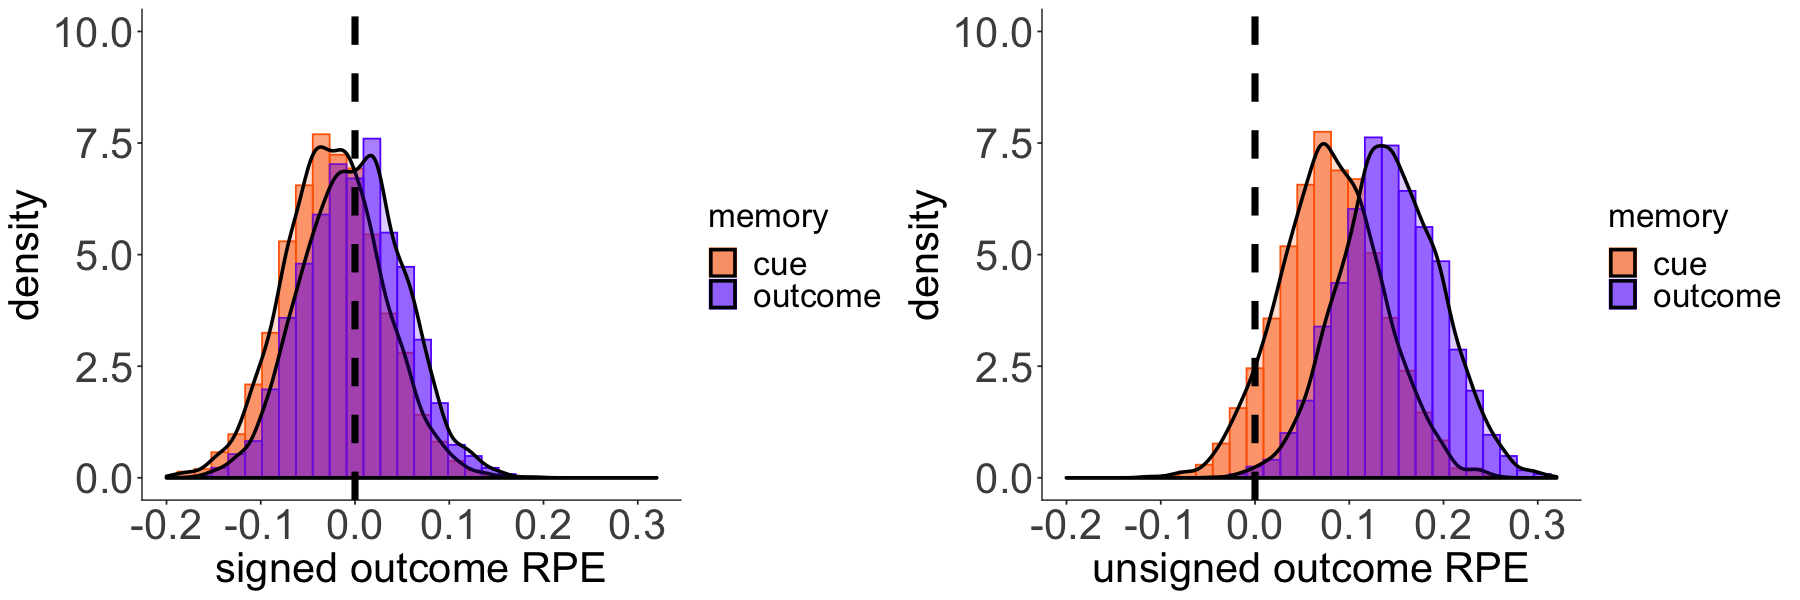

In [32]:
# set image size 
# options(repr.plot.width=12,repr.plot.height=5)
options(repr.plot.width=15,repr.plot.height=5)

# signed outcome PE on cue versus outcome 
betas_PE<-cbind(exp1_STAN$beta_PE_cue_pop,exp1_STAN$beta_PE_out_pop)
colnames(betas_PE)<-c("cue","outcome")       
betas_PE2<-melt(betas_PE)
colnames(betas_PE2)[2:3]<-c("memory","estimate")

p1<-ggplot(betas_PE2, aes(x=estimate, color=memory, fill=memory)) + 
  geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+xlab('signed outcome RPE')+
  geom_density(alpha=.2,size=1,color="black")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))

# unsigned outcome PE on cue versus outcome 
betas_absPE<-cbind(exp1_STAN$beta_absPE_cue_pop,exp1_STAN$beta_absPE_out_pop)
colnames(betas_absPE)<-c("cue","outcome")
betas_absPE2<-melt(betas_absPE)
colnames(betas_absPE2)[2:3]<-c("memory","estimate")

p2<-ggplot(betas_absPE2, aes(x=estimate, color=memory, fill=memory)) + 
  geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+xlab('unsigned outcome RPE')+
  geom_density(alpha=.2,size=1,color="black")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))

suppressMessages(grid.arrange(p1,p2,ncol=2))

## Experiment 2: explicit 

In [33]:
# analysis: explicit memory ~ experiment 2 RPE signals 
exp2PEexp<-lmer(confHit~event+scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_explicit)
summary(exp2PEexp)

# memory for cue 
exp2PEexpCue<-lmer(confHit~scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_explicit[exp2_mem_explicit$event=="cue",])
summary(exp2PEexpCue)

# memory for outcome 
exp2PEexpOut<-lmer(confHit~scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_explicit[exp2_mem_explicit$event=="outcome",])
summary(exp2PEexpOut)

# memory interactions 
exp2PEexpInt<-lmer(confHit~event*scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_explicit)
summary(exp2PEexpInt)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event + scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_explicit

REML criterion at convergence: 45927.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9910 -0.8666  0.3555  0.7324  2.0659 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.7533   0.868   
 Residual             5.2157   2.284   
Number of obs: 10100, groups:  subject, 331

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       6.212e+00  5.754e-02  4.616e+02 107.967  < 2e-16 ***
eventoutcome     -5.969e-01  4.545e-02  9.764e+03 -13.132  < 2e-16 ***
scale(out_absPE)  3.602e-02  2.436e-02  1.009e+04   1.479 0.139296    
scale(out_PE)    -3.793e-02  2.363e-02  9.974e+03  -1.605 0.108570    
scale(cue_PE)     7.854e-02  2.287e-02  9.799e+03   3.434 0.000598 ***
scale

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_explicit[exp2_mem_explicit$event == "cue", ]

REML criterion at convergence: 22513.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9551 -0.6310  0.3717  0.6679  1.8267 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.7478   0.8647  
 Residual             4.6506   2.1565  
Number of obs: 5048, groups:  subject, 331

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         6.21168    0.05641  327.31011 110.110  < 2e-16 ***
scale(out_absPE)   -0.01494    0.03228 4996.89276  -0.463  0.64346    
scale(out_PE)      -0.02072    0.03144 4881.56839  -0.659  0.50991    
scale(cue_PE)       0.08057    0.03054 4737.83245   2.639  0.00835 ** 
scale(cue_absPE)    0.07042    0.03751 3807.86622

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_explicit[exp2_mem_explicit$event == "outcome", ]

REML criterion at convergence: 23487.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5207 -0.9197  0.3604  0.7607  1.9519 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.9217   0.96    
 Residual             5.6155   2.37    
Number of obs: 5052, groups:  subject, 331

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         5.61611    0.06244  330.03311  89.946  < 2e-16 ***
scale(out_absPE)    0.09210    0.03550 4999.55689   2.594  0.00951 ** 
scale(out_PE)      -0.05032    0.03456 4884.72245  -1.456  0.14544    
scale(cue_PE)       0.07464    0.03354 4745.02289   2.225  0.02611 *  
scale(cue_absPE)    0.07530    0.04127 3853.6

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_explicit

REML criterion at convergence: 45927.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9141 -0.8622  0.3564  0.7348  2.0773 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.7534   0.868   
 Residual             5.2139   2.283   
Number of obs: 10100, groups:  subject, 331

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                      6.21193    0.05753  461.55291 107.968  < 2e-16
eventoutcome                    -0.59650    0.04544 9762.99332 -13.126  < 2e-16
scale(out_absPE)                -0.01100    0.03335 9989.81882  -0.330 0.741477
scale(out_PE)                   -0.03794    0.02363 9973.05559  -1.606 0.108403
scale(cue_PE)                  

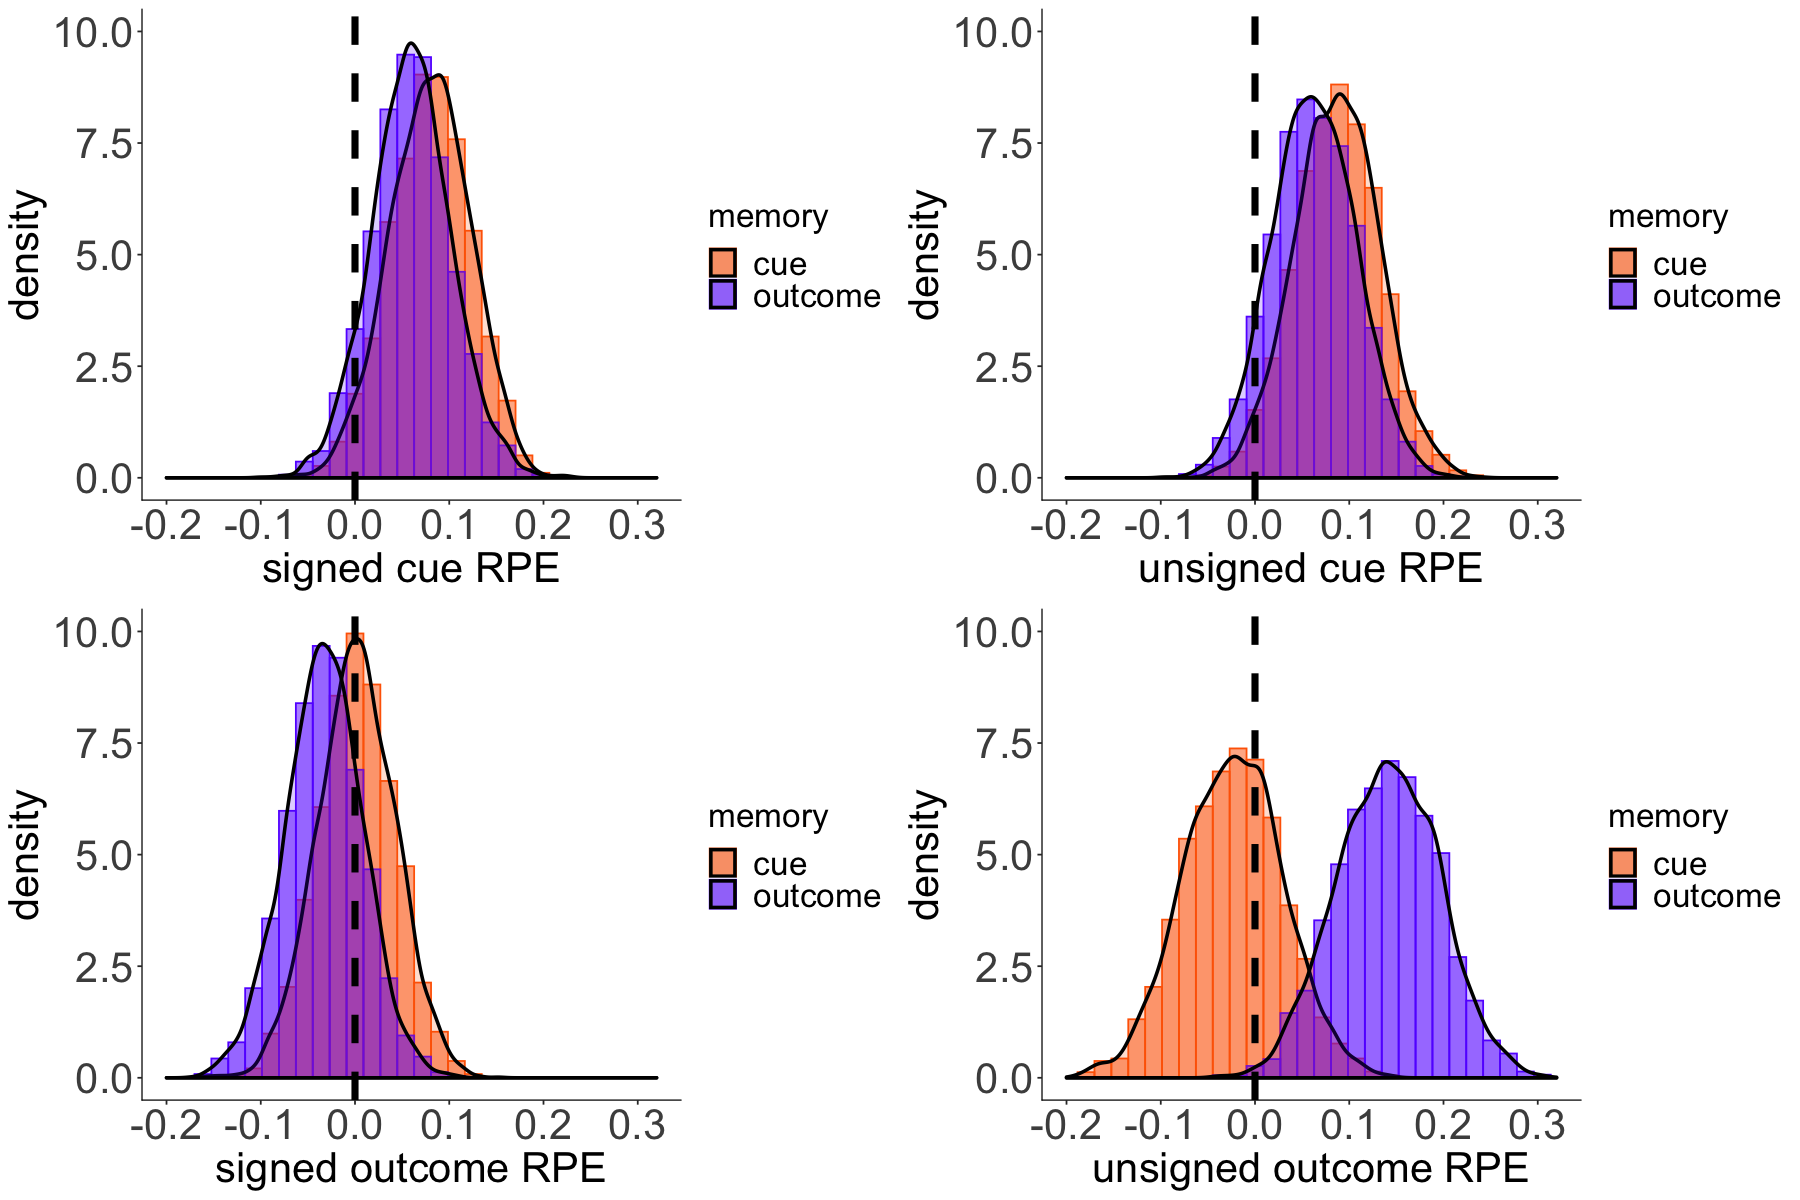

In [34]:
# set image size 
options(repr.plot.width=15,repr.plot.height=10)

# signed cue PE on cue versus outcome 
betas_cuePE<-cbind(exp2_STAN_explicit$beta_cuePE_cueMem_pop,exp2_STAN_explicit$beta_cuePE_outMem_pop)
colnames(betas_cuePE)<-c("cue","outcome")
betas_cuePE2<-melt(betas_cuePE)
colnames(betas_cuePE2)[2:3]<-c("memory","estimate")

p1<-ggplot(betas_cuePE2, aes(x=estimate, color=memory, fill=memory)) + 
  geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
  geom_density(alpha=.2,size=1,color="black")+xlab("signed cue RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))

# unsigned cue PE on cue versus outcome 
betas_cueAbsPE<-cbind(exp2_STAN_explicit$beta_cueAbsPE_cueMem_pop,exp2_STAN_explicit$beta_cueAbsPE_outMem_pop)
colnames(betas_cueAbsPE)<-c("cue","outcome")
betas_cueAbsPE2<-melt(betas_cueAbsPE)
colnames(betas_cueAbsPE2)[2:3]<-c("memory","estimate")

p2<-ggplot(betas_cueAbsPE2, aes(x=estimate, color=memory, fill=memory)) + 
  geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
  geom_density(alpha=.2,size=1,color="black")+xlab("unsigned cue RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))

# signed out PE on cue versus outcome 
betas_outPE<-cbind(exp2_STAN_explicit$beta_outPE_cueMem_pop,exp2_STAN_explicit$beta_outPE_outMem_pop)
colnames(betas_outPE)<-c("cue","outcome")
betas_outPE2<-melt(betas_outPE)
colnames(betas_outPE2)[2:3]<-c("memory","estimate")

p3<-ggplot(betas_outPE2, aes(x=estimate, color=memory, fill=memory)) + 
  geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
  geom_density(alpha=.2,size=1,color="black")+xlab("signed outcome RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))

# unsigned out PE on cue versus outcome 
betas_outAbsPE<-cbind(exp2_STAN_explicit$beta_outAbsPE_cueMem_pop,exp2_STAN_explicit$beta_outAbsPE_outMem_pop)
colnames(betas_outAbsPE)<-c("cue","outcome")
betas_outAbsPE2<-melt(betas_outAbsPE)
colnames(betas_outAbsPE2)[2:3]<-c("memory","estimate")

p4<-ggplot(betas_outAbsPE2, aes(x=estimate, color=memory, fill=memory)) + 
  geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
  geom_density(alpha=.2,size=1,color="black")+xlab("unsigned outcome RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=25),legend.text=element_text(size=20),legend.title=element_text(size=20))

suppressMessages(grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2))

## Experiment 2: implicit  

In [35]:
# analysis: implicit memory ~ experiment 2 RPE signals 
exp2PEimp<-lmer(confHit~event+scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_implicit)
summary(exp2PEimp)

# memory for cue 
exp2PEimpCue<-lmer(confHit~scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_implicit[exp2_mem_implicit$event=="cue",])
summary(exp2PEimpCue)

# memory for outcome 
exp2PEimpOut<-lmer(confHit~scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_implicit[exp2_mem_implicit$event=="outcome",])
summary(exp2PEimpOut)

# memory interactions 
exp2PEimpInt<-lmer(confHit~event*scale(out_absPE)+scale(out_PE)+scale(cue_PE)+scale(cue_absPE)+(1|subject),data=exp2_mem_implicit)
summary(exp2PEimpInt)

exp2PEimpInt<-lmer(confHit~event*scale(cue_absPE)+scale(out_absPE)+scale(out_PE)+scale(cue_PE)+(1|subject),data=exp2_mem_implicit)
summary(exp2PEimpInt)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event + scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_implicit

REML criterion at convergence: 49310.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7966 -0.8525  0.3726  0.7328  2.5226 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6845   0.8273  
 Residual             5.3883   2.3213  
Number of obs: 10775, groups:  subject, 354

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       6.259e+00  5.418e-02  5.132e+02 115.526  < 2e-16 ***
eventoutcome     -7.045e-01  4.473e-02  1.042e+04 -15.750  < 2e-16 ***
scale(out_absPE)  5.674e-02  2.463e-02  1.073e+04   2.303  0.02128 *  
scale(out_PE)    -3.004e-02  2.382e-02  1.072e+04  -1.261  0.20732    
scale(cue_PE)     5.925e-02  2.273e-02  1.048e+04   2.607  0.00916 ** 
scale

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_implicit[exp2_mem_implicit$event == "cue", ]

REML criterion at convergence: 24110.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9644 -0.4809  0.3974  0.6535  2.2032 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6838   0.8269  
 Residual             4.7452   2.1783  
Number of obs: 5388, groups:  subject, 354

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       6.257e+00  5.305e-02  3.534e+02 117.935  < 2e-16 ***
scale(out_absPE)  6.345e-03  3.237e-02  5.383e+03   0.196  0.84458    
scale(out_PE)    -2.613e-03  3.146e-02  5.280e+03  -0.083  0.93380    
scale(cue_PE)     9.158e-02  3.014e-02  5.078e+03   3.038  0.00239 ** 
scale(cue_absPE)  1.048e-01  3.576e-02  4.213e+03

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_implicit[exp2_mem_implicit$event == "outcome", ]

REML criterion at convergence: 25226.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4301 -0.9181  0.3836  0.7851  2.1596 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.8801   0.9381  
 Residual             5.8317   2.4149  
Number of obs: 5387, groups:  subject, 354

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         5.55591    0.05976  353.99385  92.968  < 2e-16 ***
scale(out_absPE)    0.10773    0.03584 5381.56829   3.006  0.00266 ** 
scale(out_PE)      -0.05619    0.03487 5274.35249  -1.612  0.10711    
scale(cue_PE)       0.02686    0.03342 5075.93594   0.804  0.42166    
scale(cue_absPE)    0.01199    0.03969 4297.4

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(out_absPE) + scale(out_PE) + scale(cue_PE) +  
    scale(cue_absPE) + (1 | subject)
   Data: exp2_mem_implicit

REML criterion at convergence: 49310.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7864 -0.8542  0.3733  0.7310  2.5353 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6845   0.8273  
 Residual             5.3868   2.3210  
Number of obs: 10775, groups:  subject, 354

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                    6.259e+00  5.418e-02  5.131e+02 115.527   <2e-16
eventoutcome                  -7.038e-01  4.472e-02  1.042e+04 -15.737   <2e-16
scale(out_absPE)               1.220e-02  3.334e-02  1.074e+04   0.366   0.7145
scale(out_PE)                 -2.989e-02  2.382e-02  1.072e+04  -1.255   0.2095
scale(cue_PE)                  

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
confHit ~ event * scale(cue_absPE) + scale(out_absPE) + scale(out_PE) +  
    scale(cue_PE) + (1 | subject)
   Data: exp2_mem_implicit

REML criterion at convergence: 49309.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7982 -0.8527  0.3686  0.7313  2.4931 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6847   0.8275  
 Residual             5.3863   2.3208  
Number of obs: 10775, groups:  subject, 354

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                    6.259e+00  5.418e-02  5.131e+02 115.522  < 2e-16
eventoutcome                  -7.045e-01  4.472e-02  1.042e+04 -15.753  < 2e-16
scale(cue_absPE)               1.104e-01  3.574e-02  9.953e+03   3.088  0.00202
scale(out_absPE)               5.675e-02  2.463e-02  1.073e+04   2.304  0.02122
scale(out_PE)                 

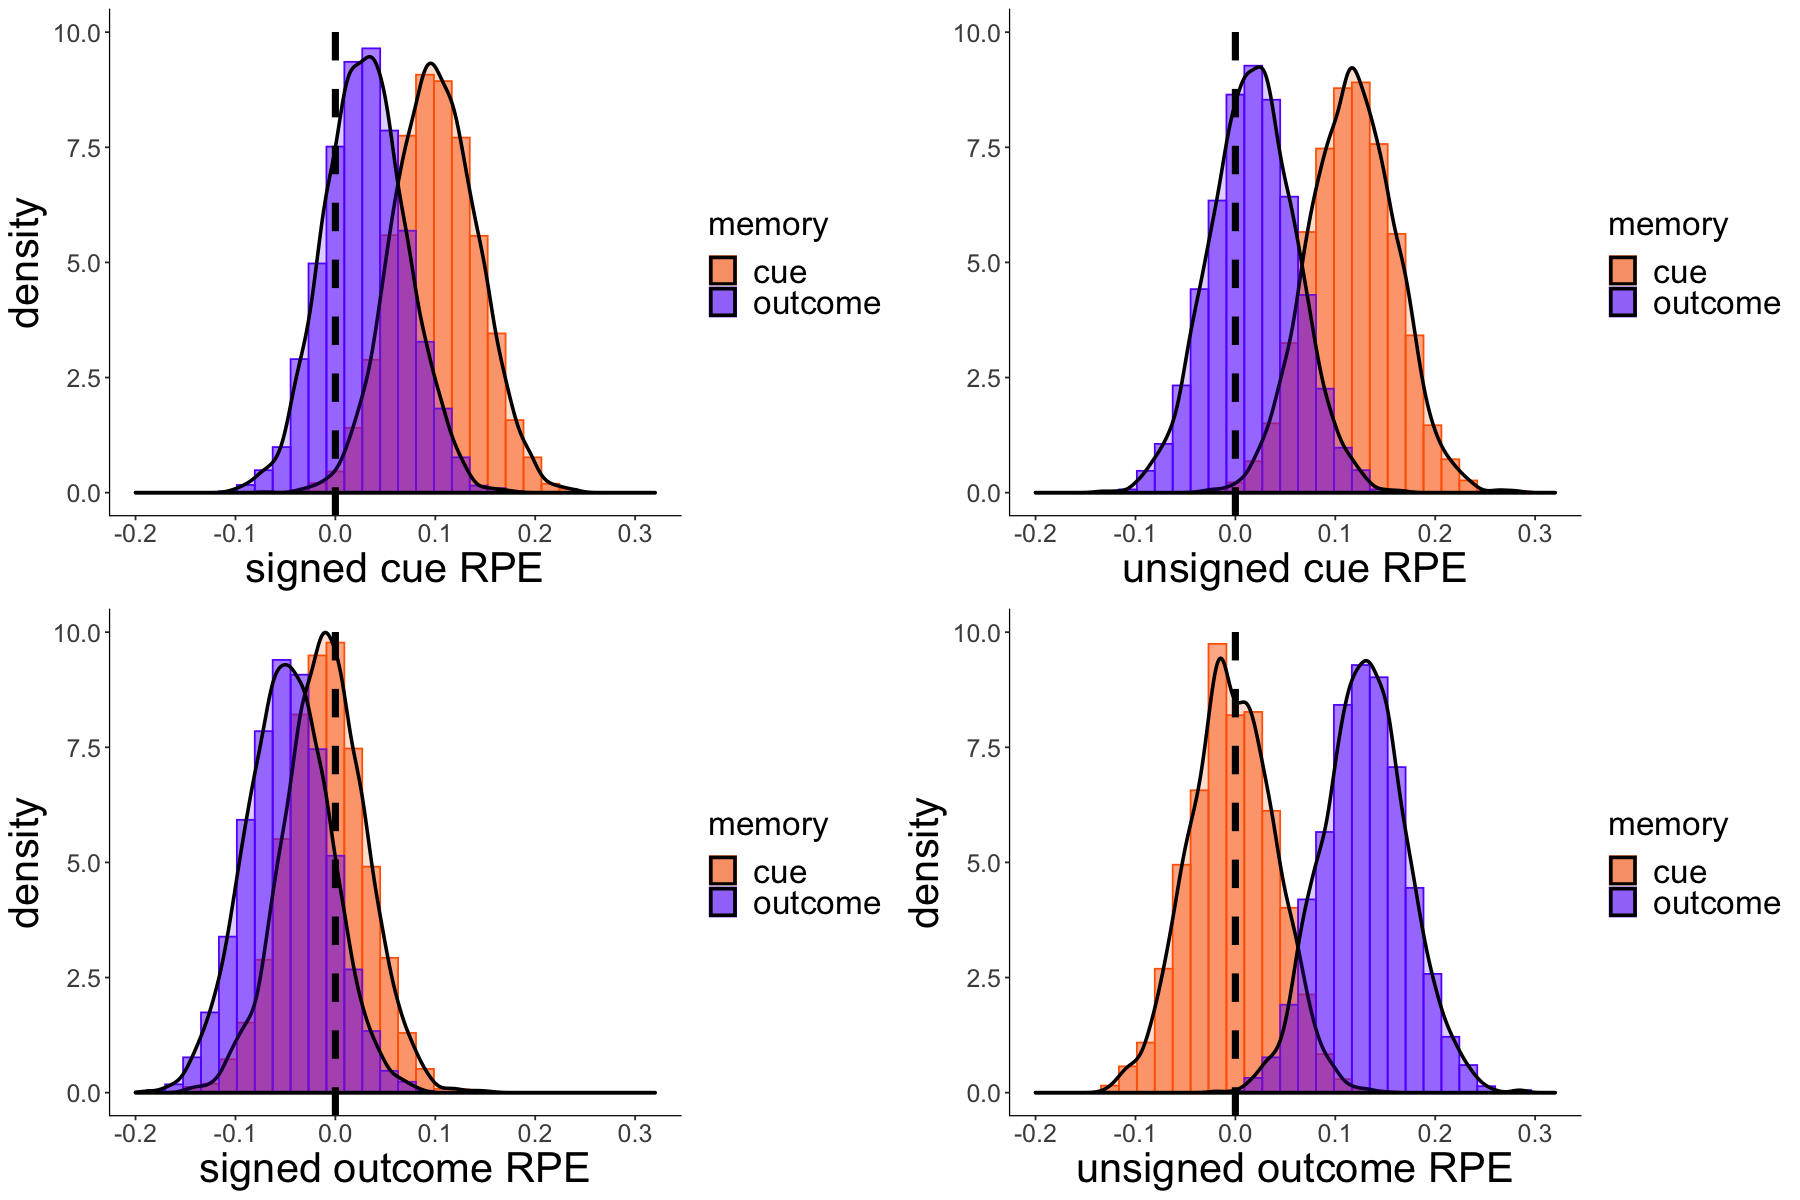

In [36]:
# set image size 
options(repr.plot.width=15,repr.plot.height=10)

# signed cue PE on cue versus outcome
betas_cuePE<-cbind(exp2_STAN_implicit$beta_cuePE_cueMem_pop,exp2_STAN_implicit$beta_cuePE_outMem_pop)
colnames(betas_cuePE)<-c("cue","outcome")
betas_cuePE2<-melt(betas_cuePE)
colnames(betas_cuePE2)[2:3]<-c("memory","estimate")

p1<-ggplot(betas_cuePE2, aes(x=estimate, color=memory, fill=memory)) +
geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
geom_density(alpha=.2,size=1,color="black")+xlab("signed cue RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))

# unsigned cue PE on cue versus outcome
betas_cueAbsPE<-cbind(exp2_STAN_implicit$beta_cueAbsPE_cueMem_pop,exp2_STAN_implicit$beta_cueAbsPE_outMem_pop)
colnames(betas_cueAbsPE)<-c("cue","outcome")
betas_cueAbsPE2<-melt(betas_cueAbsPE)
colnames(betas_cueAbsPE2)[2:3]<-c("memory","estimate")

p2<-ggplot(betas_cueAbsPE2, aes(x=estimate, color=memory, fill=memory)) +
geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylab("")+ylim(0,10)+
geom_density(alpha=.2,size=1,color="black")+xlab("unsigned cue RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))

# signed out PE on cue versus outcome
betas_outPE<-cbind(exp2_STAN_implicit$beta_outPE_cueMem_pop,exp2_STAN_implicit$beta_outPE_outMem_pop)
colnames(betas_outPE)<-c("cue","outcome")
betas_outPE2<-melt(betas_outPE)
colnames(betas_outPE2)[2:3]<-c("memory","estimate")

p3<-ggplot(betas_outPE2, aes(x=estimate, color=memory, fill=memory)) +
geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
geom_density(alpha=.2,size=1,color="black")+xlab("signed outcome RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))

# unsigned out PE on cue versus outcome
betas_outAbsPE<-cbind(exp2_STAN_implicit$beta_outAbsPE_cueMem_pop,exp2_STAN_implicit$beta_outAbsPE_outMem_pop)
colnames(betas_outAbsPE)<-c("cue","outcome")
betas_outAbsPE2<-melt(betas_outAbsPE)
colnames(betas_outAbsPE2)[2:3]<-c("memory","estimate")

p4<-ggplot(betas_outAbsPE2, aes(x=estimate, color=memory, fill=memory)) +
geom_histogram(aes(y=..density..), alpha=0.5, position="identity")+ylim(0,10)+
geom_density(alpha=.2,size=1,color="black")+xlab("unsigned outcome RPE")+geom_vline(xintercept=0,linetype="dashed",colour="black",size=2)+
scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_colour_manual(values=c("#ff6600","#6600ff"))+xlim(-0.2,0.32)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=25),axis.text = element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))

suppressMessages(grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2))

In [37]:
# between experiment testing 
lmerPE<-lmer(confHit~scale(cue_absPE)*memoryType+(1|subject),data=exp2_memory[exp2_memory$event=='cue',])
summary(lmerPE)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ scale(cue_absPE) * memoryType + (1 | subject)
   Data: exp2_memory[exp2_memory$event == "cue", ]

REML criterion at convergence: 46610.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8811 -0.5459  0.3857  0.6592  2.1650 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.7131   0.8445  
 Residual             4.7053   2.1692  
Number of obs: 10436, groups:  subject, 685

Fixed effects:
                                     Estimate Std. Error        df t value
(Intercept)                         6.206e+00  5.566e-02 6.836e+02 111.501
scale(cue_absPE)                    7.496e-02  3.693e-02 7.860e+03   2.030
memoryTypeimplicit                  5.935e-02  7.743e-02 6.839e+02   0.766
scale(cue_absPE):memoryTypeimplicit 2.929e-02  5.150e-02 8.075e+03   0.569
                                    Pr(>|t|)    
(Intercept)                        

## reward outcome and value estimate effects on memory

In [38]:
# analysis: memory ~ reward outcome * event type (cue or outcome)

# experiment 1
exp1rew<-lmer(confHit~event*scale(reward)+(1|subject),data=exp1_memory)
summary(exp1rew)

# experiment 2 - explicit 
exp2rewExp<-lmer(confHit~event*scale(reward)+(1|subject),data=exp2_mem_explicit)
summary(exp2rewExp)

# experiment 2 - implicit 
exp2rewImp<-lmer(confHit~event*scale(reward)+(1|subject),data=exp2_mem_implicit)
summary(exp2rewImp)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(reward) + (1 | subject)
   Data: exp1_memory

REML criterion at convergence: 17028.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2310 -0.7379  0.3137  0.7138  2.0010 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6558   0.8098  
 Residual             4.4617   2.1123  
Number of obs: 3888, groups:  subject, 81

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   6.50669    0.10194  101.06166  63.828   <2e-16
eventoutcome                 -0.83848    0.06775 3804.00000 -12.376   <2e-16
scale(reward)                -0.03259    0.04791 3804.00000  -0.680    0.496
eventoutcome:scale(reward)    0.07232    0.06776 3804.00000   1.067    0.286
                              
(Intercept)                ***
eventoutcome               ***
scale(reward)        

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(reward) + (1 | subject)
   Data: exp2_mem_explicit

REML criterion at convergence: 48056.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8333 -0.8698  0.3564  0.7398  2.0848 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.7351   0.8574  
 Residual             5.2644   2.2944  
Number of obs: 10554, groups:  subject, 331

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                 6.204e+00  5.674e-02  4.618e+02 109.355   <2e-16
eventoutcome               -6.014e-01  4.467e-02  1.022e+04 -13.463   <2e-16
scale(reward)               2.878e-02  3.168e-02  1.024e+04   0.909    0.364
eventoutcome:scale(reward)  2.469e-02  4.469e-02  1.022e+04   0.553    0.581
                              
(Intercept)                ***
eventoutcome               ***
scale(reward)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(reward) + (1 | subject)
   Data: exp2_mem_implicit

REML criterion at convergence: 51233.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8179 -0.8587  0.3687  0.7366  2.4418 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.682    0.8258  
 Residual             5.405    2.3248  
Number of obs: 11193, groups:  subject, 354

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                 6.246e+00  5.378e-02  5.079e+02 116.125   <2e-16
eventoutcome               -6.967e-01  4.395e-02  1.084e+04 -15.851   <2e-16
scale(reward)               4.696e-02  3.113e-02  1.086e+04   1.508    0.131
eventoutcome:scale(reward) -4.312e-02  4.396e-02  1.084e+04  -0.981    0.327
                              
(Intercept)                ***
eventoutcome               ***
scale(reward)

In [39]:
# analysis: memory ~ value estimate * event type (cue or outcome)

# experiment 1 
exp1val<-lmer(confHit~event*scale(estimate)+(1|subject),data=exp1_memory)
summary(exp1val)

# experiment 2 - explicit
exp2valExp<-lmer(confHit~event*scale(estimate)+(1|subject),data=exp2_mem_explicit)
summary(exp2valExp)

# experiment 2 - implicit
exp2valImp<-lmer(confHit~event*scale(estimate)+(1|subject),data=exp2_mem_implicit)
summary(exp2valImp)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(estimate) + (1 | subject)
   Data: exp1_memory

REML criterion at convergence: 16944.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2326 -0.7295  0.3115  0.7180  1.9853 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6548   0.8092  
 Residual             4.4458   2.1085  
Number of obs: 3872, groups:  subject, 81

Fixed effects:
                               Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   6.515e+00  1.019e-01  1.011e+02  63.947   <2e-16
eventoutcome                 -8.456e-01  6.777e-02  3.788e+03 -12.477   <2e-16
scale(estimate)              -7.400e-03  4.879e-02  3.823e+03  -0.152    0.879
eventoutcome:scale(estimate) -4.363e-03  6.778e-02  3.788e+03  -0.064    0.949
                                
(Intercept)                  ***
eventoutcome                 ***
sca

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(estimate) + (1 | subject)
   Data: exp2_mem_explicit

REML criterion at convergence: 47766.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8755 -0.8626  0.3576  0.7325  2.0794 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.743    0.862   
 Residual             5.239    2.289   
Number of obs: 10500, groups:  subject, 331

Fixed effects:
                               Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   6.207e+00  5.695e-02  4.600e+02 108.992   <2e-16
eventoutcome                 -5.957e-01  4.468e-02  1.017e+04 -13.332   <2e-16
scale(estimate)               6.039e-02  3.193e-02  1.026e+04   1.891   0.0586
eventoutcome:scale(estimate)  5.306e-02  4.467e-02  1.017e+04   1.188   0.2350
                                
(Intercept)                  ***
eventoutcome                

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: confHit ~ event * scale(estimate) + (1 | subject)
   Data: exp2_mem_implicit

REML criterion at convergence: 51226.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8071 -0.8628  0.3705  0.7380  2.4355 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.6835   0.8268  
 Residual             5.4008   2.3240  
Number of obs: 11193, groups:  subject, 354

Fixed effects:
                               Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   6.246e+00  5.382e-02  5.075e+02 116.054   <2e-16
eventoutcome                 -6.968e-01  4.394e-02  1.084e+04 -15.860   <2e-16
scale(estimate)               8.235e-02  3.188e-02  1.107e+04   2.583   0.0098
eventoutcome:scale(estimate) -2.735e-02  4.394e-02  1.084e+04  -0.622   0.5337
                                
(Intercept)                  ***
eventoutcome                

# Choice

## Experiment 2: between pairs

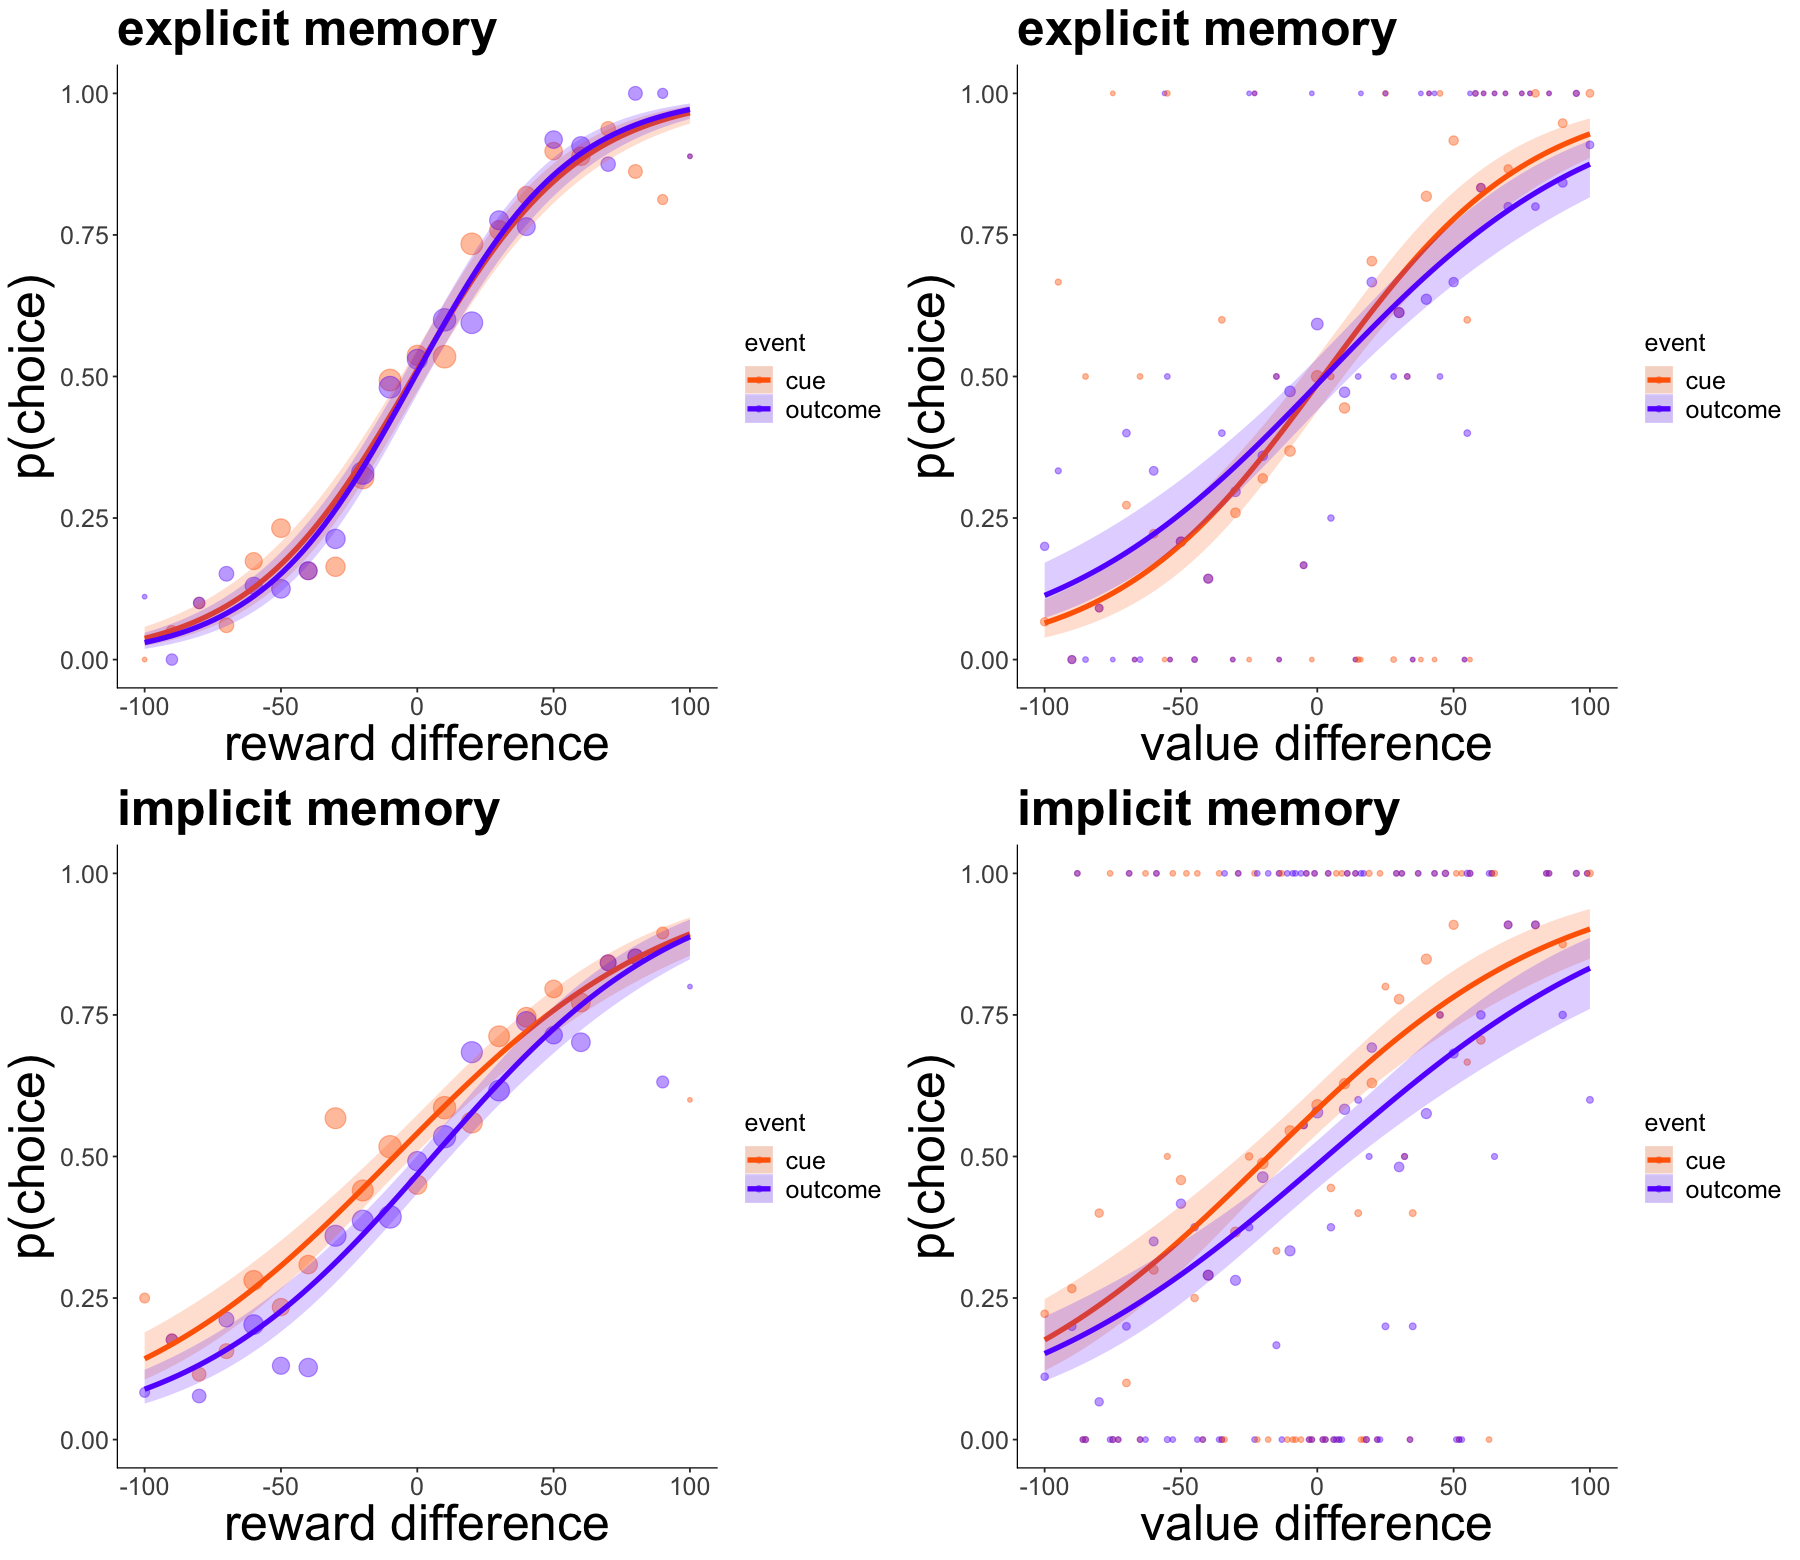

In [40]:
options(repr.plot.width=15,repr.plot.height=13)

# EXPLICIT

colnames(exp2_explicit_btwn)[8]<-'event'

# reward difference 
exp2_explicit_btwn_rewMeans<-summarySE(exp2_explicit_btwn,measurevar="leftChoice",groupvars=c("rewDiff","event"),na.rm=TRUE)
colnames(exp2_explicit_btwn_rewMeans)[2]<-c('event')

p1<-ggplot(exp2_explicit_btwn,aes(x=rewDiff,y=leftChoice,fill=event))+
  geom_point(data=exp2_explicit_btwn_rewMeans,aes(x=rewDiff, y=leftChoice, colour=event,size=N),alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),aes(colour=event),alpha=0.2,size=1.5)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_color_manual(values=c("#ff6600","#6600ff"))+         
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25))+
  xlab("reward difference")+ylab("p(choice)")+xlim(-100,100)+ylim(0,1)+guides(size=FALSE)+ggtitle('explicit memory')

# value difference 
exp2_explicit_btwn_valMeans<-summarySE(exp2_explicit_btwn,measurevar="leftChoice",groupvars=c("cue_PEDiff","event"),na.rm=TRUE)
colnames(exp2_explicit_btwn_valMeans)[2]<-c('event')

p2<-ggplot(exp2_explicit_btwn,aes(x=cue_PEDiff,y=leftChoice,fill=event))+
  geom_point(data=exp2_explicit_btwn_valMeans,aes(x=cue_PEDiff, y=leftChoice, colour=event,size=N),alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),aes(colour=event),alpha=0.2,size=1.5)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_color_manual(values=c("#ff6600","#6600ff"))+         
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25))+
  xlab("value difference")+ylab("p(choice)")+xlim(-100,100)+ylim(0,1)+guides(size=FALSE)+ggtitle('explicit memory')

# IMPLICIT

colnames(exp2_implicit_btwn)[8]<-'event'

# reward difference 
exp2_implicit_btwn_rewMeans<-summarySE(exp2_implicit_btwn,measurevar="leftChoice",groupvars=c("rewDiff","event"),na.rm=TRUE)

p3<-ggplot(exp2_implicit_btwn,aes(x=rewDiff,y=leftChoice,fill=event))+
  geom_point(data=exp2_implicit_btwn_rewMeans,aes(x=rewDiff, y=leftChoice, colour=event,size=N),alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),aes(colour=event),alpha=0.2,size=1.5)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_color_manual(values=c("#ff6600","#6600ff"))+         
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25))+
  xlab("reward difference")+ylab("p(choice)")+xlim(-100,100)+ylim(0,1)+guides(size=FALSE)+ggtitle('implicit memory')

# value difference 
exp2_implicit_btwn_valMeans<-summarySE(exp2_implicit_btwn,measurevar="leftChoice",groupvars=c("cue_PEDiff","event"),na.rm=TRUE)

p4<-ggplot(exp2_implicit_btwn,aes(x=cue_PEDiff,y=leftChoice,fill=event))+
  geom_point(data=exp2_implicit_btwn_valMeans,aes(x=cue_PEDiff, y=leftChoice, colour=event,size=N),alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),aes(colour=event),alpha=0.2,size=1.5)+
  scale_fill_manual(values=c("#ff6600","#6600ff"))+scale_color_manual(values=c("#ff6600","#6600ff"))+         
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25))+
  xlab("value difference")+ylab("p(choice)")+xlim(-100,100)+ylim(0,1)+guides(size=FALSE)+ggtitle('implicit memory')

grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

In [41]:
# analysis: choice ~ reward and value difference

# EXPLICIT 
rewModExp<-glmer(leftChoice~scale(rewDiff)+(1|subject),family=binomial,data=exp2_explicit_btwn,glmerControl(optimizer="bobyqa"))
summary(rewModExp)

valModExp<-glmer(leftChoice~scale(rewDiff)+scale(cue_PEDiff)+(1|subject),family=binomial,data=exp2_explicit_btwn,glmerControl(optimizer="bobyqa"))
summary(valModExp)

# IMPLICIT 
rewModImp<-glmer(leftChoice~scale(rewDiff)+(scale(rewDiff)|subject),family=binomial,data=exp2_implicit_btwn,glmerControl(optimizer="bobyqa"))
summary(rewModImp)

valModImp<-glmer(leftChoice~scale(rewDiff)+scale(cue_PEDiff)+(scale(cue_PEDiff)|subject),family=binomial,data=exp2_implicit_btwn,glmerControl(optimizer="bobyqa"))
summary(valModImp)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: leftChoice ~ scale(rewDiff) + (1 | subject)
   Data: exp2_explicit_btwn
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2016.1   2032.9  -1005.1   2010.1     1973 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1818 -0.6108  0.1799  0.6213  4.9936 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.112    0.3347  
Number of obs: 1976, groups:  subject, 331

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.04615    0.05867   0.787    0.431    
scale(rewDiff)  1.59032    0.07902  20.126   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(rwDff) 0.036 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: leftChoice ~ scale(rewDiff) + scale(cue_PEDiff) + (1 | subject)
   Data: exp2_explicit_btwn
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1332.5   1353.1   -662.2   1324.5     1288 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1986 -0.6216  0.1656  0.6057  6.0273 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.3545   0.5954  
Number of obs: 1292, groups:  subject, 329

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.02679    0.07782   0.344    0.731    
scale(rewDiff)     0.85726    0.11638   7.366 1.76e-13 ***
scale(cue_PEDiff)  0.91749    0.12110   7.576 3.56e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) scl(D)
scal(rwDff)  0.034     

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: leftChoice ~ scale(rewDiff) + (scale(rewDiff) | subject)
   Data: exp2_implicit_btwn
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2479.4   2507.6  -1234.7   2469.4     2099 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4723 -0.7787  0.1731  0.7803  2.2889 

Random effects:
 Groups  Name           Variance Std.Dev. Corr 
 subject (Intercept)    0.08522  0.2919        
         scale(rewDiff) 1.00203  1.0010   -0.02
Number of obs: 2104, groups:  subject, 354

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.03106    0.06130   0.507    0.612    
scale(rewDiff)  1.21353    0.09884  12.277   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(rwDff) -0.003

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
leftChoice ~ scale(rewDiff) + scale(cue_PEDiff) + (scale(cue_PEDiff) |  
    subject)
   Data: exp2_implicit_btwn
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1565.9   1597.3   -777.0   1553.9     1375 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7238 -0.7240  0.1850  0.7273  2.6593 

Random effects:
 Groups  Name              Variance Std.Dev. Corr 
 subject (Intercept)       0.1910   0.4370        
         scale(cue_PEDiff) 0.6018   0.7757   -0.15
Number of obs: 1381, groups:  subject, 353

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.10131    0.07803   1.298    0.194    
scale(rewDiff)     0.62333    0.09142   6.819 9.19e-12 ***
scale(cue_PEDiff)  1.03148    0.13166   7.835 4.70e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

## Experiment 1-2: within pairs 

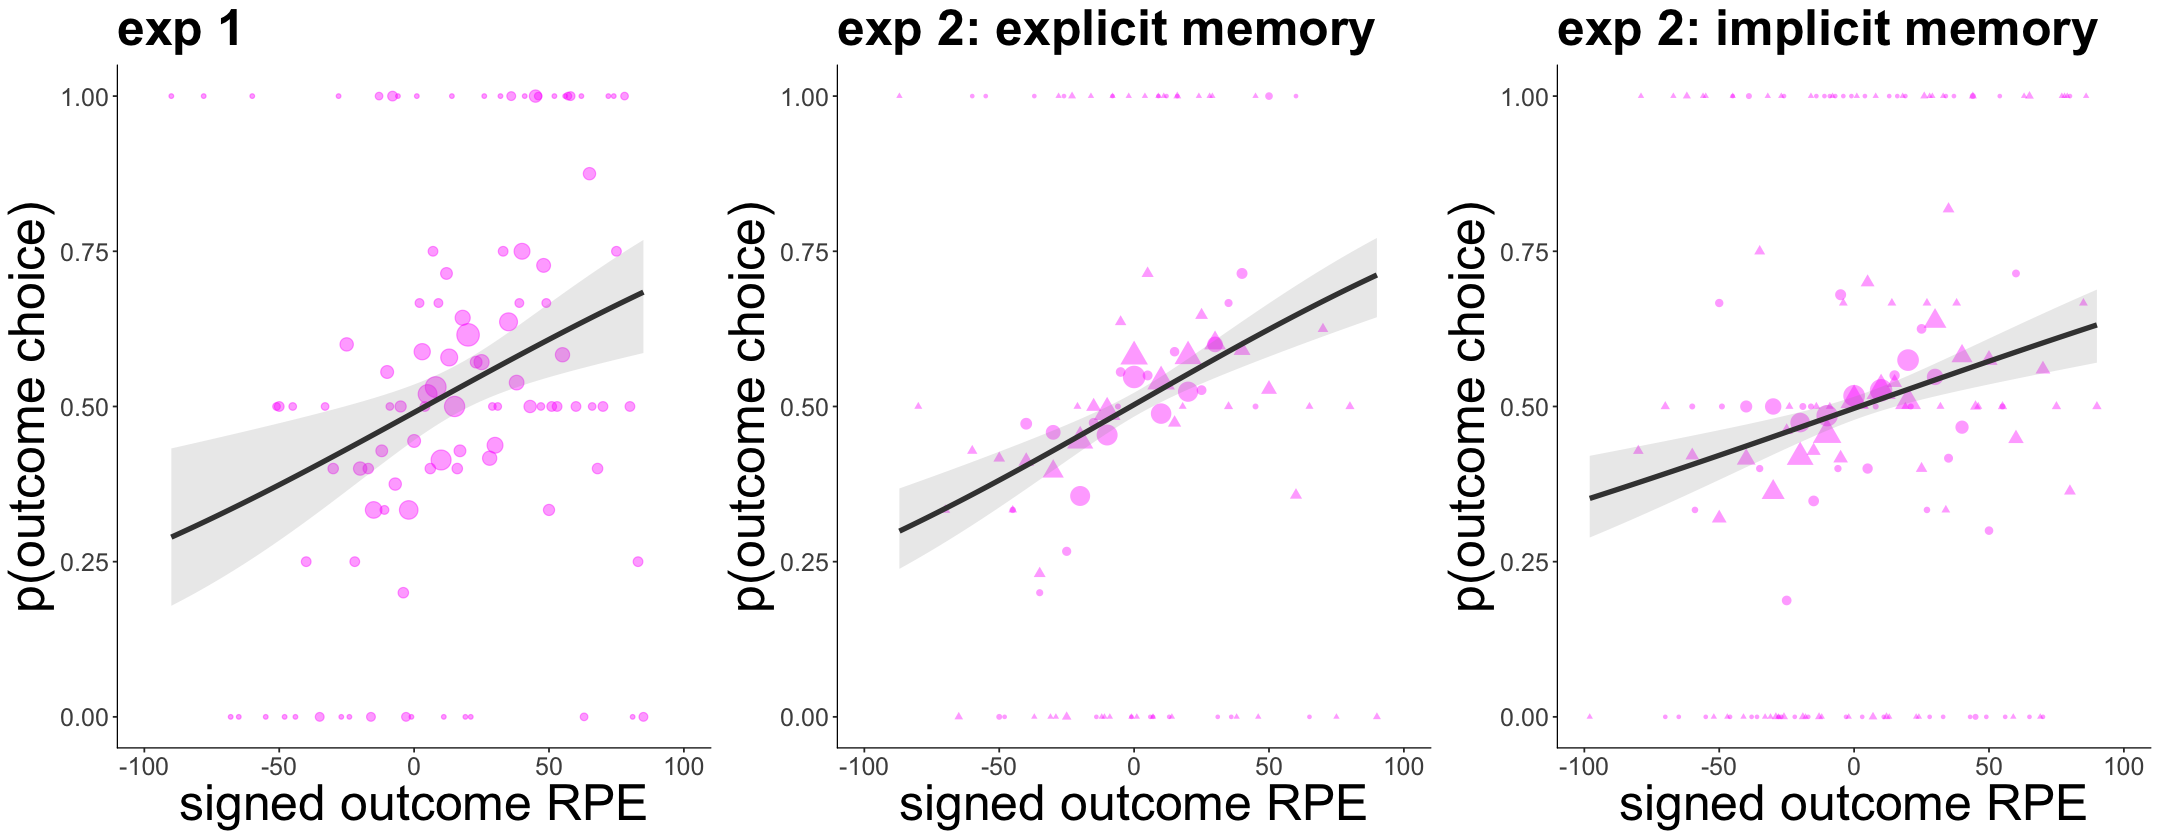

In [42]:
# set image size 
options(repr.plot.width=18,repr.plot.height=7) 

# EXP 1
exp1_within_means<-summarySE(exp1_within,measurevar="choiceOut",groupvars=c("out_PE_choiceLeft"),na.rm=TRUE)

p1<-ggplot(exp1_within,aes(x=out_PE_choiceLeft,y=choiceOut))+
  geom_point(data=exp1_within_means,aes(x=out_PE_choiceLeft, y=choiceOut,size=N),color="magenta",alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),color="#404040",alpha=0.2,size=1.5)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25),legend.position="none")+
  xlab("signed outcome RPE")+ylab("p(outcome choice)")+xlim(-100,100)+ggtitle('exp 1') 

# EXP 2: EXPLICIT
exp2_explicit_within_means<-summarySE(exp2_explicit_within,measurevar="choiceOut",groupvars=c("out_PE_choiceLeft","condition"),na.rm=TRUE)

p2<-ggplot(exp2_explicit_within,aes(x=out_PE_choiceLeft,y=choiceOut))+
  geom_point(data=exp2_explicit_within_means,aes(x=out_PE_choiceLeft, y=choiceOut,size=N,shape=condition),colour="magenta",alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),color="#404040",alpha=0.2,size=1.5)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25),legend.position="none")+
  xlab("signed outcome RPE")+ylab("p(outcome choice)")+xlim(-100,100)+ggtitle('exp 2: explicit memory')   

# EXP 2: IMPLICIT 
exp2_implicit_within_means<-summarySE(exp2_implicit_within,measurevar="choiceOut",groupvars=c("out_PE_choiceLeft","condition"),na.rm=TRUE)

p3<-ggplot(exp2_implicit_within,aes(x=out_PE_choiceLeft,y=choiceOut))+
  geom_point(data=exp2_implicit_within_means,aes(x=out_PE_choiceLeft, y=choiceOut,size=N,shape=condition),colour="magenta",alpha=0.4)+stat_smooth(method = "glm", method.args=list(family="binomial"),color="#404040",alpha=0.2,size=1.5)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), plot.title = element_text(size = 30, face = "bold"), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=15),legend.text=element_text(size=15),legend.title=element_text(size=15),strip.text = element_text(size=25),legend.position="none")+
  xlab("signed outcome RPE")+ylab("p(outcome choice)")+xlim(-100,100)+ggtitle('exp 2: implicit memory')    

# plot fig
grid.arrange(p1,p2,p3,nrow=1)

In [43]:
# analysis: choice for outcome event ~ signed outcome RPE

# experiment 1 
exp1_withinMod<-glmer(choiceOut~scale(out_PE_choiceLeft)+(1|subject),family=binomial,data=exp1_within,glmerControl(optimizer="bobyqa",calc.derivs=FALSE))
summary(exp1_withinMod)

# experiment 2 - explicit
exp2_withinMod_exp<-glmer(choiceOut~scale(out_PE_choiceLeft)+(1|subject),family=binomial,data=exp2_explicit_within,glmerControl(optimizer="bobyqa",calc.derivs=FALSE))
summary(exp2_withinMod_exp)

# experiment 2 - implicit
exp2_withinMod_imp<-glmer(choiceOut~scale(out_PE_choiceLeft)+(1|subject),family=binomial,data=exp2_implicit_within,glmerControl(optimizer="bobyqa",calc.derivs=FALSE))
summary(exp2_withinMod_imp)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choiceOut ~ scale(out_PE_choiceLeft) + (1 | subject)
   Data: exp1_within
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
   887.0    900.4   -440.5    881.0      642 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4720 -1.0289  0.7474  0.9490  1.5666 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0        0       
Number of obs: 645, groups:  subject, 81

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)               0.11679    0.07956   1.468  0.14212   
scale(out_PE_choiceLeft)  0.26573    0.08129   3.269  0.00108 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scl(t_PE_L) 0.015 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choiceOut ~ scale(out_PE_choiceLeft) + (1 | subject)
   Data: exp2_explicit_within
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
  3603.1   3620.8  -1798.6   3597.1     2616 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5717 -1.0058  0.7758  0.9942  1.5306 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0        0       
Number of obs: 2619, groups:  subject, 331

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               0.02406    0.03933   0.612    0.541    
scale(out_PE_choiceLeft)  0.22793    0.03997   5.702 1.18e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scl(t_PE_L) 0.004 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choiceOut ~ scale(out_PE_choiceLeft) + (1 | subject)
   Data: exp2_implicit_within
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
  3861.9   3879.8  -1928.0   3855.9     2792 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3087 -0.9941  0.7759  0.9907  1.2845 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0        0       
Number of obs: 2795, groups:  subject, 354

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               0.00499    0.03796   0.131    0.895    
scale(out_PE_choiceLeft)  0.16468    0.03826   4.304 1.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scl(t_PE_L) 0.001 

In [44]:
# analysis: choice for outcome event ~ signed outcome RPE + controlling for unsigned outcome RPE

# experiment 1 
exp1_withinMod<-glmer(choiceOut~scale(out_PE_choiceLeft)+scale(out_absPE_choiceLeft)+(1|subject),family=binomial,data=exp1_within,glmerControl(optimizer="bobyqa",calc.derivs=FALSE))
summary(exp1_withinMod)

# experiment 2 - explicit
exp2_withinMod_exp<-glmer(choiceOut~scale(out_PE_choiceLeft)+scale(out_absPE_choiceLeft)+(1|subject),family=binomial,data=exp2_explicit_within,glmerControl(optimizer="bobyqa",calc.derivs=FALSE))
summary(exp2_withinMod_exp)

# experiment 2 - implicit
exp2_withinMod_imp<-glmer(choiceOut~scale(out_PE_choiceLeft)+scale(out_absPE_choiceLeft)+(1|subject),family=binomial,data=exp2_implicit_within,glmerControl(optimizer="bobyqa",calc.derivs=FALSE))
summary(exp2_withinMod_imp)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choiceOut ~ scale(out_PE_choiceLeft) + scale(out_absPE_choiceLeft) +  
    (1 | subject)
   Data: exp1_within
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
   889.0    906.9   -440.5    881.0      641 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4800 -1.0267  0.7449  0.9505  1.5354 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0        0       
Number of obs: 645, groups:  subject, 81

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)  
(Intercept)                  0.11693    0.07959   1.469   0.1418  
scale(out_PE_choiceLeft)     0.26135    0.10174   2.569   0.0102 *
scale(out_absPE_choiceLeft)  0.00726    0.10173   0.071   0.9431  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choiceOut ~ scale(out_PE_choiceLeft) + scale(out_absPE_choiceLeft) +  
    (1 | subject)
   Data: exp2_explicit_within
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
  3600.1   3623.6  -1796.1   3592.1     2615 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2755 -1.0647  0.8496  0.9392  1.9499 

Random effects:
 Groups  Name        Variance  Std.Dev. 
 subject (Intercept) 1.531e-13 3.913e-07
Number of obs: 2619, groups:  subject, 331

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  0.02233    0.03938   0.567   0.5706    
scale(out_PE_choiceLeft)     0.23906    0.04042   5.914 3.34e-09 ***
scale(out_absPE_choiceLeft) -0.09028    0.04047  -2.231   0.0257 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choiceOut ~ scale(out_PE_choiceLeft) + scale(out_absPE_choiceLeft) +  
    (1 | subject)
   Data: exp2_implicit_within
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
  3862.7   3886.4  -1927.3   3854.7     2791 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2144 -1.0212  0.8314  0.9698  1.4073 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0        0       
Number of obs: 2795, groups:  subject, 354

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  0.004556   0.037968   0.120    0.904    
scale(out_PE_choiceLeft)     0.174037   0.039225   4.437 9.13e-06 ***
scale(out_absPE_choiceLeft) -0.043980   0.039199  -1.122    0.262    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.